# **DengAI: Predicting Disease Spread**

In [ ]:
# Source Data
TRAIN_FEATURES_URL = "https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_train.csv"
TRAIN_LABELS_URL = "https://s3.amazonaws.com/drivendata/data/44/public/dengue_labels_train.csv"
TEST_FEATURES_URL = "https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_test.csv"

# Explorative Data Analysis


In [ ]:
# !pip install --upgrade matplotlib

In [ ]:
# !pip install --upgrade seaborn

In [ ]:
# !pip install --upgrade numpy

In [ ]:
# !pip install --upgrade pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error

In [ ]:
pd.__version__,np.__version__

('1.1.5', '1.19.5')

In [ ]:
# ,index_col=['city','year','weekofyear']

train_features_df = pd.read_csv(TRAIN_FEATURES_URL,index_col=['city','year','weekofyear'])
train_labels_df = pd.read_csv(TRAIN_LABELS_URL,index_col=['city','year','weekofyear'])
# test_features_df = pd.read_csv(TEST_FEATURES_URL,index_col=['city','year','weekofyear'])

In [ ]:
train_features_df.head()

week_start_date  ...  station_precip_mm
city year weekofyear                  ...                   
sj   1990 18              1990-04-30  ...               16.0
          19              1990-05-07  ...                8.6
          20              1990-05-14  ...               41.4
          21              1990-05-21  ...                4.0
          22              1990-05-28  ...                5.8

[5 rows x 21 columns]

In [ ]:
train_features_df.loc[:,'week_start_date'] = train_features_df.loc[:,'week_start_date'].astype('datetime64[ns]')
train_features_df.dtypes

week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           float64
reanalysis_tdtr_k                               float64
station_avg_temp_c                              float64
station_diur_temp_rng_c                         

In [ ]:
train_labels_df.head()

total_cases
city year weekofyear             
sj   1990 18                    4
          19                    5
          20                    4
          21                    3
          22                    6

In [ ]:
train_labels_df.dtypes

total_cases    int64
dtype: object

In [ ]:
# test_features_df.head()

In [ ]:
# test_features_df.dtypes

In [ ]:
# Seperate train data for San Juan
sj_train_features = train_features_df.loc['sj']
sj_train_labels = train_labels_df.loc['sj']

# Separate train data for Iquitos
iq_train_features = train_features_df.loc['iq']
iq_train_labels = train_labels_df.loc['iq']

# Seperate test data for San Juan
# sj_test_features = test_features_df.loc['sj']

# Separate test data for Iquitos
# iq_test_features = test_features_df.loc['iq']

In [ ]:
print("San Juan number of Features: {}, Labels: {}".format(len(sj_train_features),len(sj_train_labels)))
print("Iquitos number of Features: {}, Labels: {}".format(len(iq_train_features),len(iq_train_labels)))

San Juan number of Features: 936, Labels: 936
Iquitos number of Features: 520, Labels: 520


In [ ]:
sj_train_features.head()

week_start_date  ...  station_precip_mm
year weekofyear                  ...                   
1990 18              1990-04-30  ...               16.0
     19              1990-05-07  ...                8.6
     20              1990-05-14  ...               41.4
     21              1990-05-21  ...                4.0
     22              1990-05-28  ...                5.8

[5 rows x 21 columns]

In [ ]:
sj_train_labels.head()

total_cases
year weekofyear             
1990 18                    4
     19                    5
     20                    4
     21                    3
     22                    6

In [ ]:
# sj_test_features.head()

In [ ]:
iq_train_features.head()

week_start_date  ...  station_precip_mm
year weekofyear                  ...                   
2000 26              2000-07-01  ...                3.0
     27              2000-07-08  ...               55.6
     28              2000-07-15  ...               38.1
     29              2000-07-22  ...               30.0
     30              2000-07-29  ...                4.0

[5 rows x 21 columns]

In [ ]:
iq_train_labels.head()

total_cases
year weekofyear             
2000 26                    0
     27                    0
     28                    0
     29                    0
     30                    0

In [ ]:
# iq_test_features.head()

In [ ]:
sj_train_labels.index = sj_train_labels.index.to_flat_index()

In [ ]:
sj_train_labels.head()

total_cases
(1990, 18)            4
(1990, 19)            5
(1990, 20)            4
(1990, 21)            3
(1990, 22)            6

In [ ]:
sj_train_features.index = sj_train_features.index.to_flat_index()

In [ ]:
# sj_test_features.index = sj_test_features.index.to_flat_index()

In [ ]:
iq_train_labels.index = iq_train_labels.index.to_flat_index()

In [ ]:
iq_train_features.index = iq_train_features.index.to_flat_index()

In [ ]:
# iq_test_features.index = iq_test_features.index.to_flat_index()

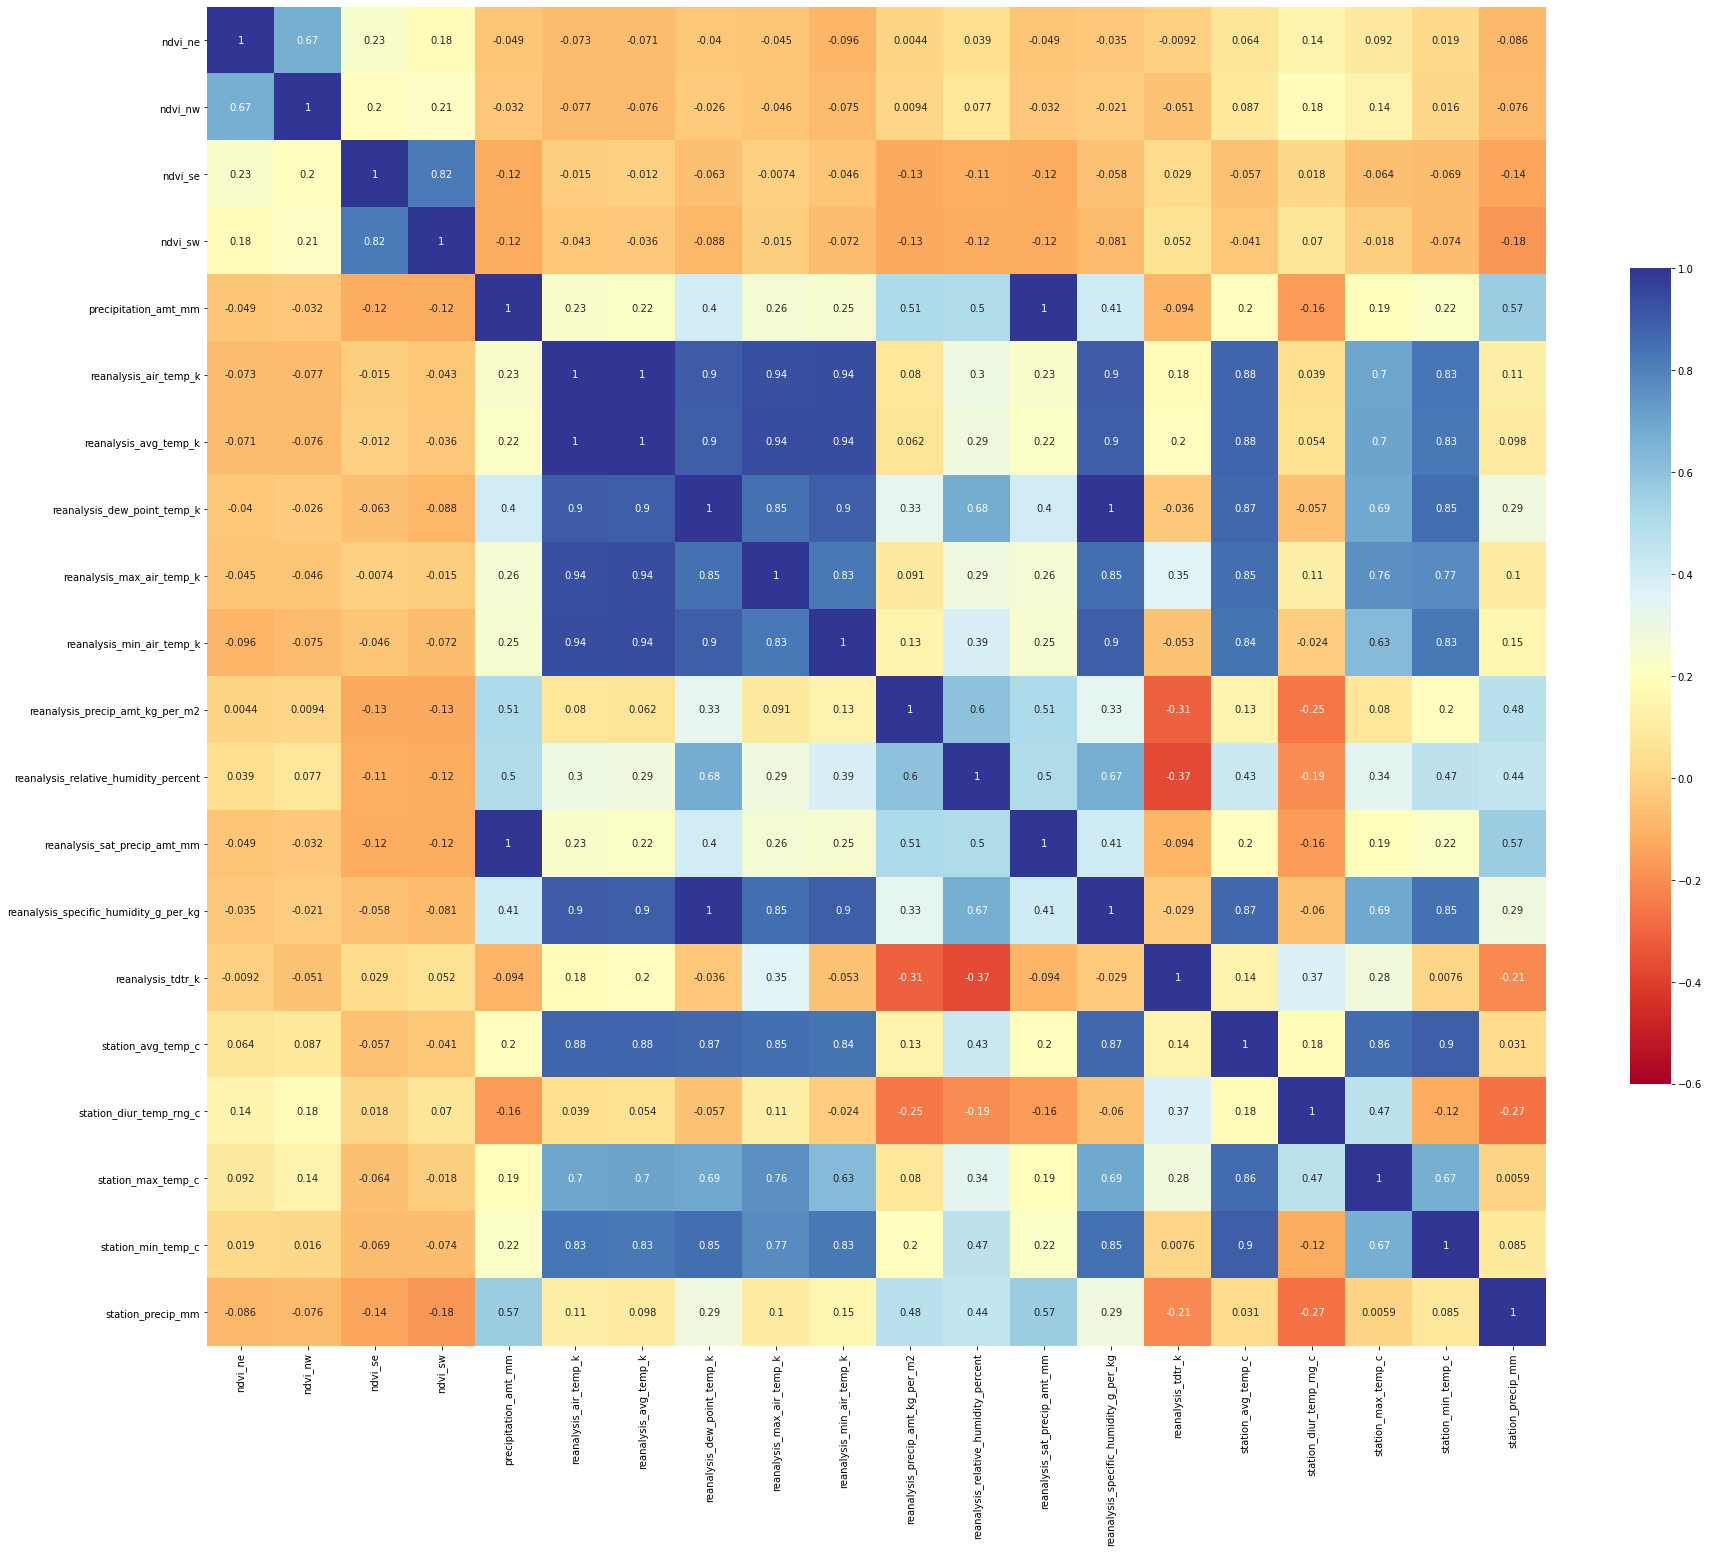

In [ ]:
corr = sj_train_features.corr()
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

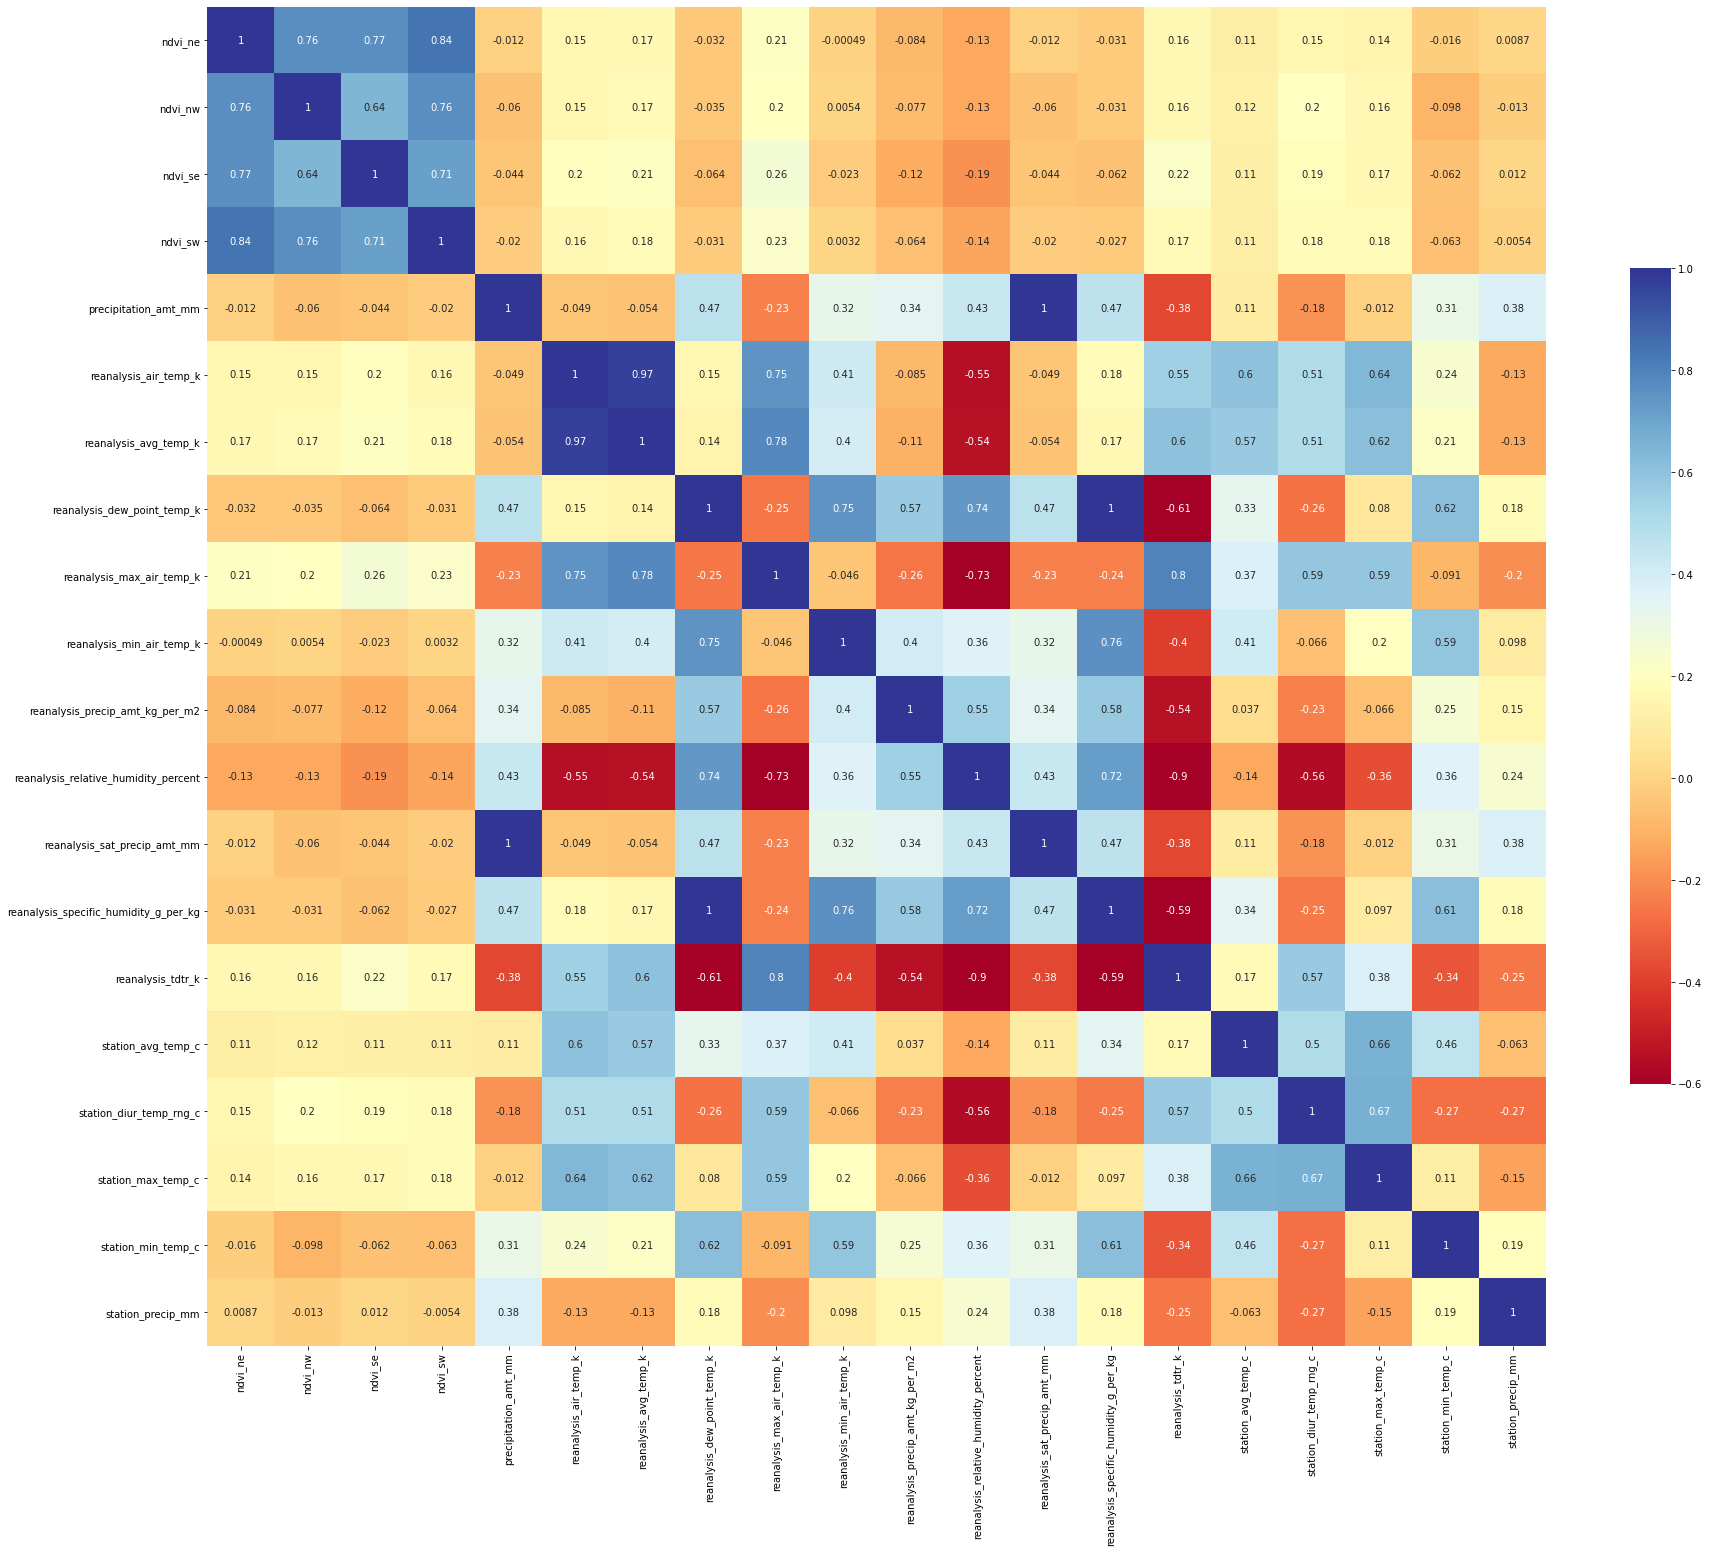

In [ ]:
corr = iq_train_features.corr()
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

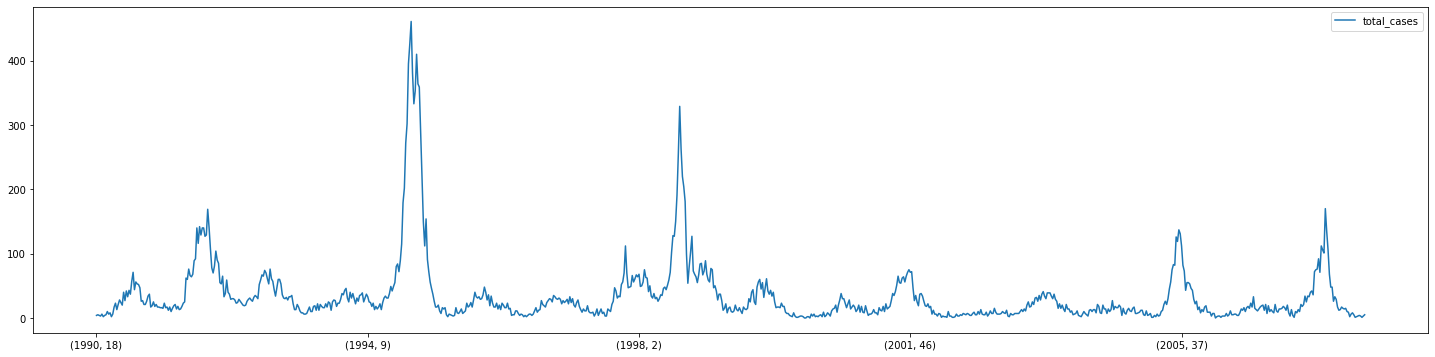

In [ ]:
sj_train_labels.plot(figsize=(25,6));

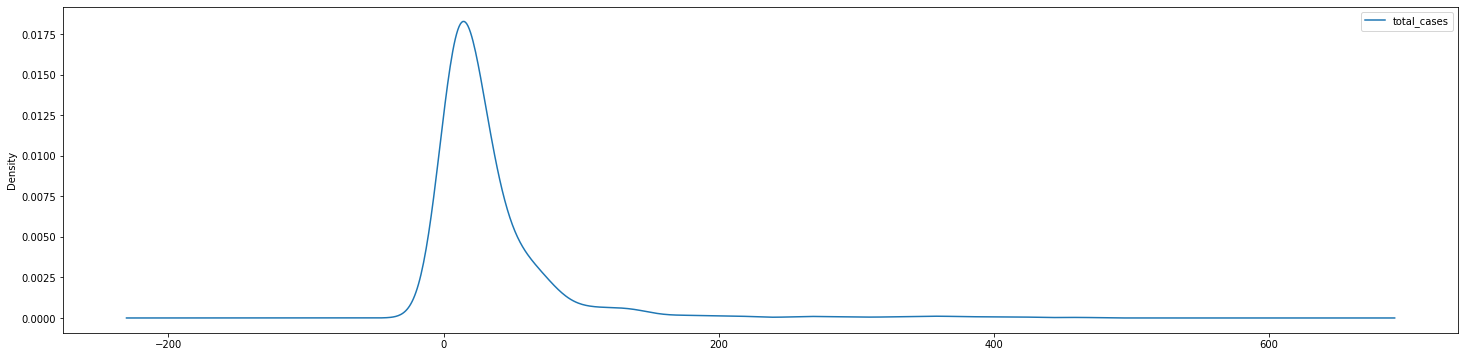

In [ ]:
sj_train_labels.plot.density(figsize=(25,6));

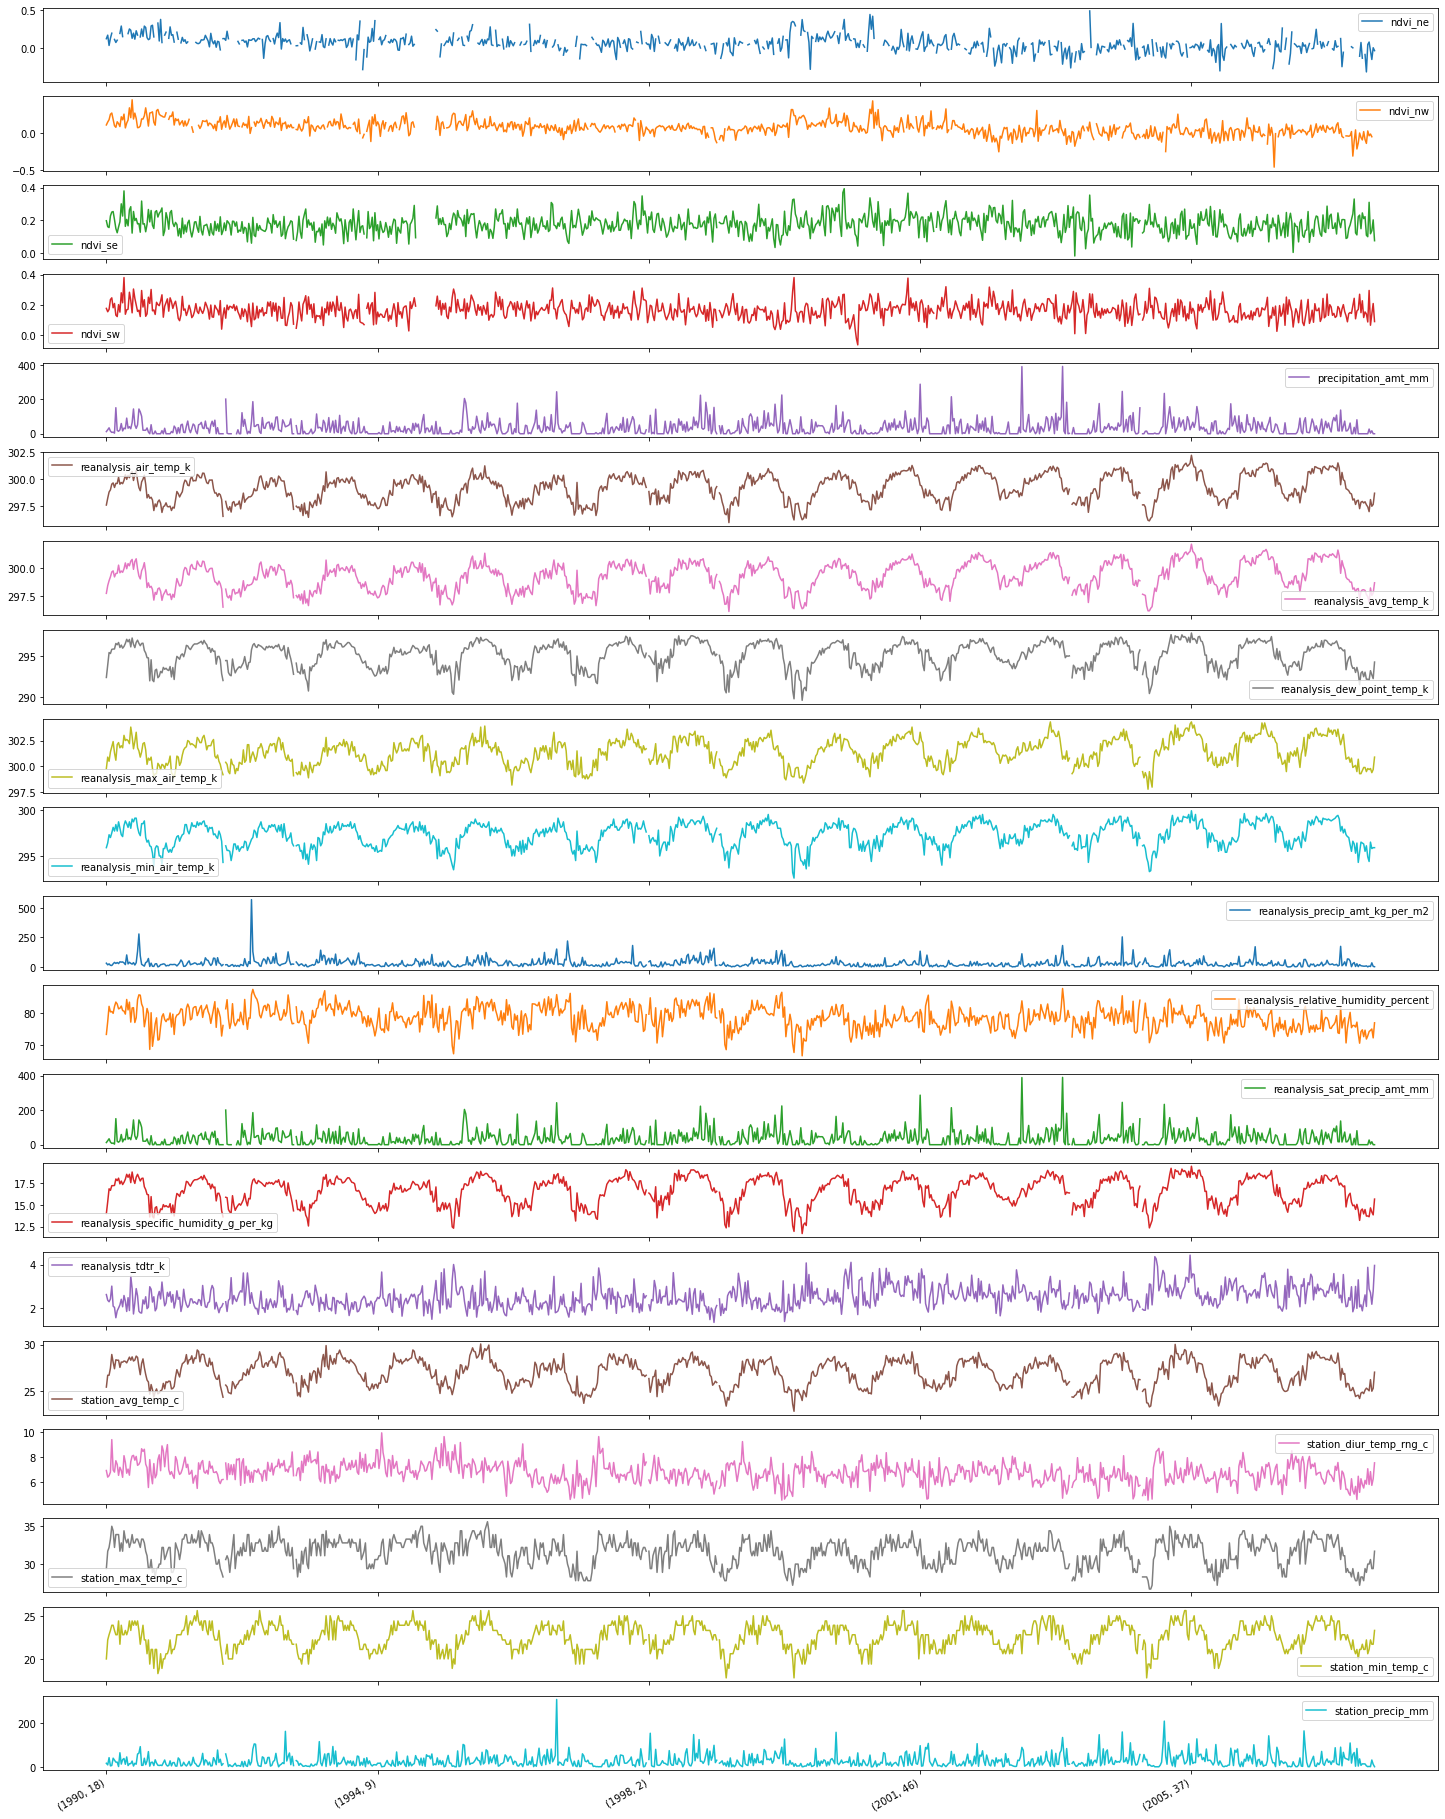

In [ ]:
sj_train_features.loc[:,sj_train_features.columns != 'week_start_date'].plot(figsize=(25,36),subplots=True);

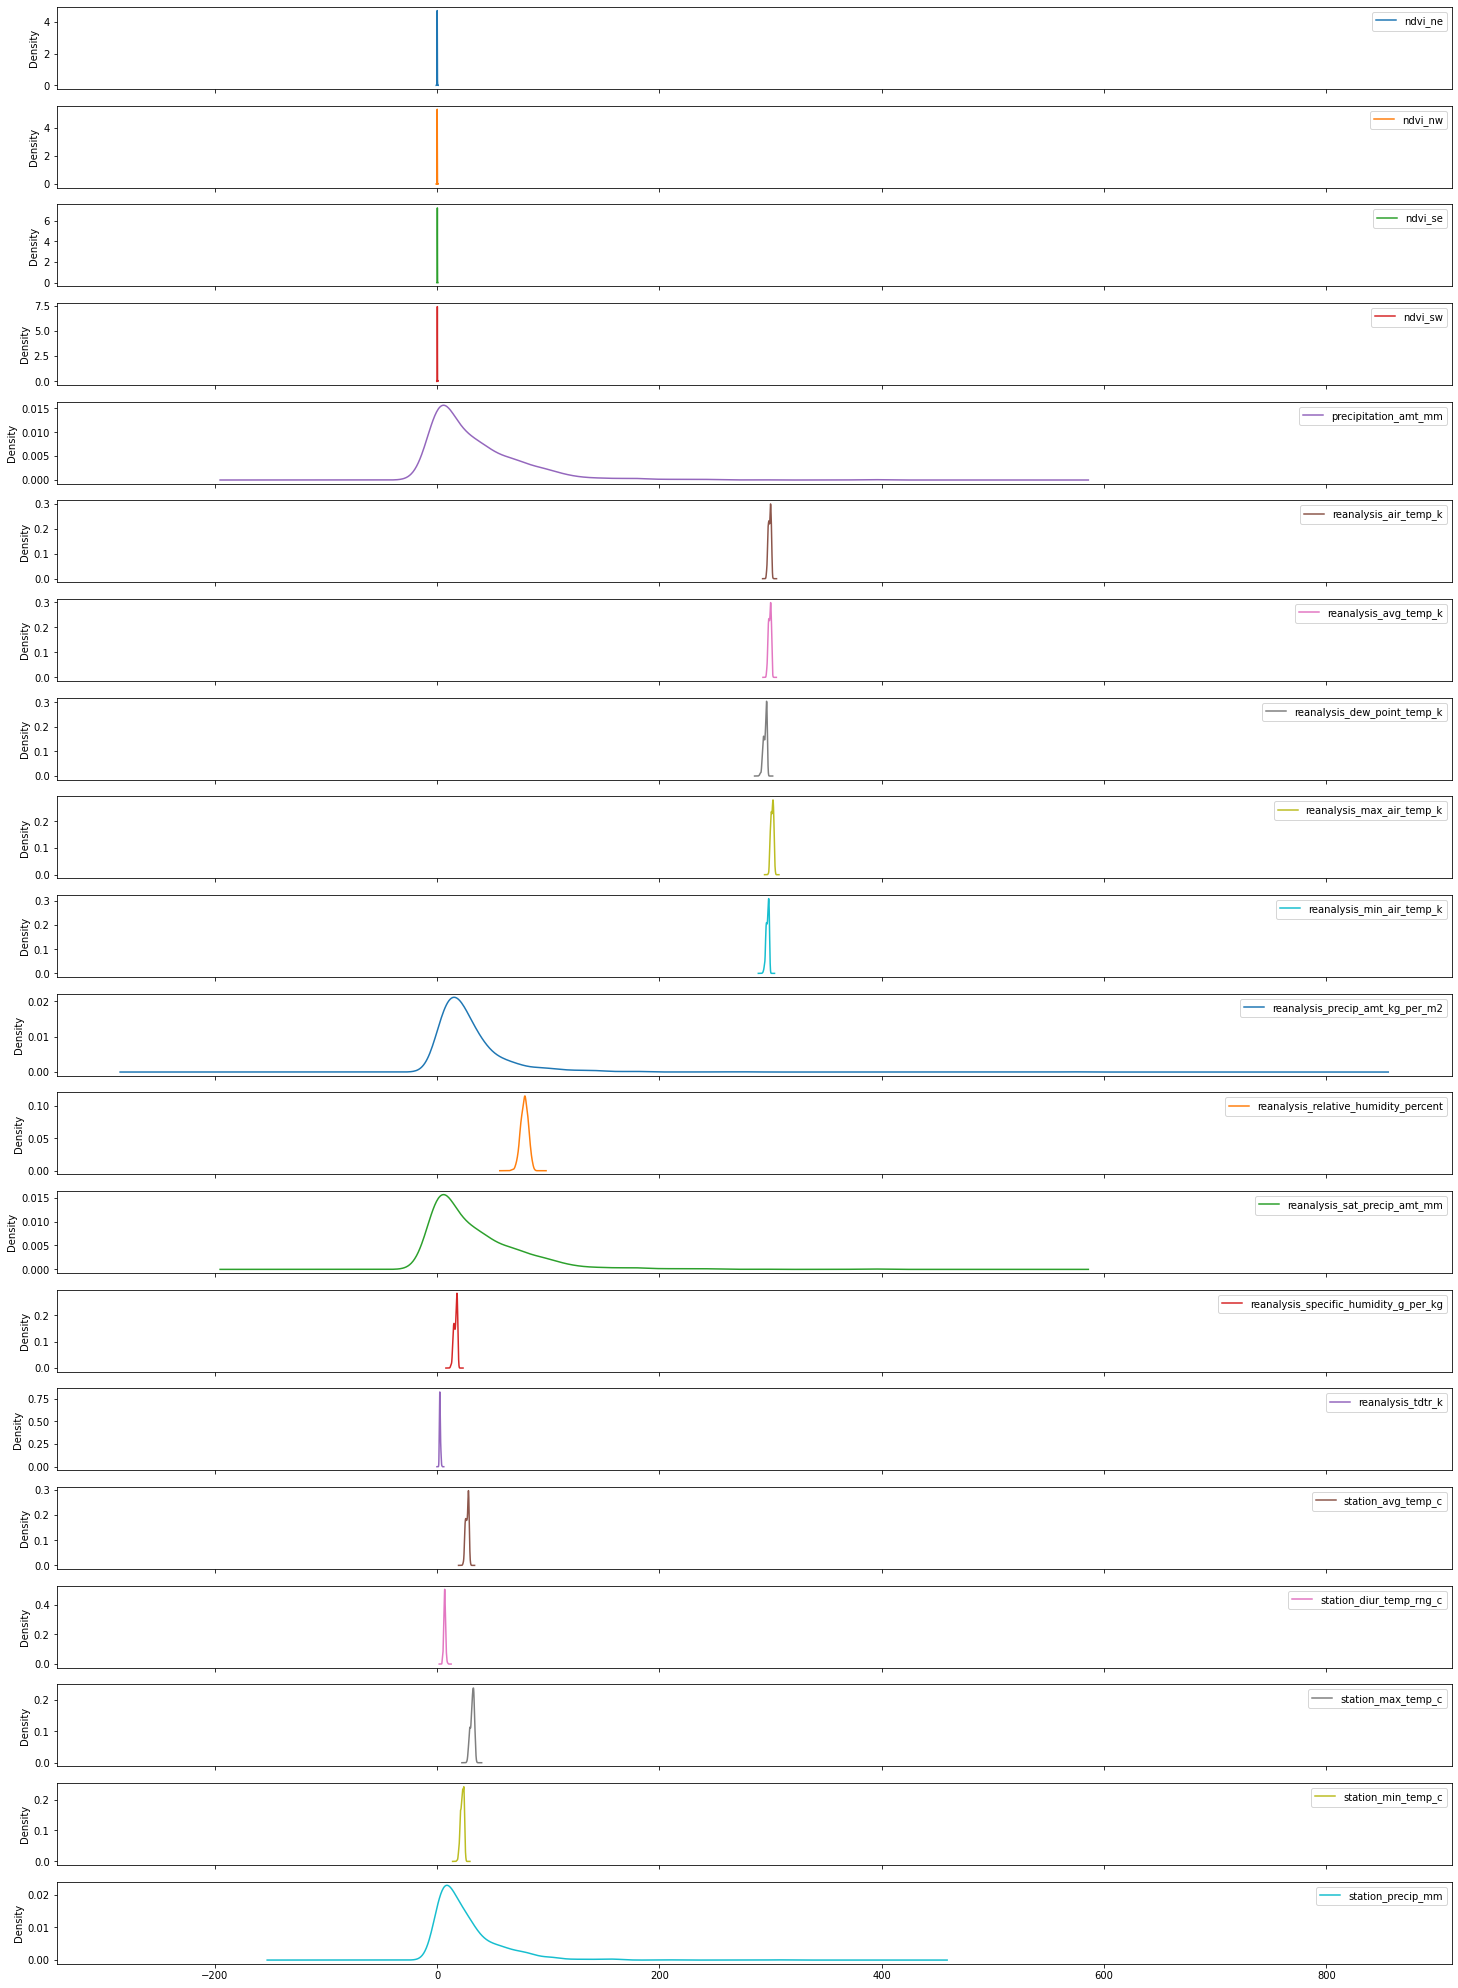

In [ ]:
sj_train_features.loc[:,sj_train_features.columns != 'week_start_date'].plot.density(figsize=(25,36),subplots=True);

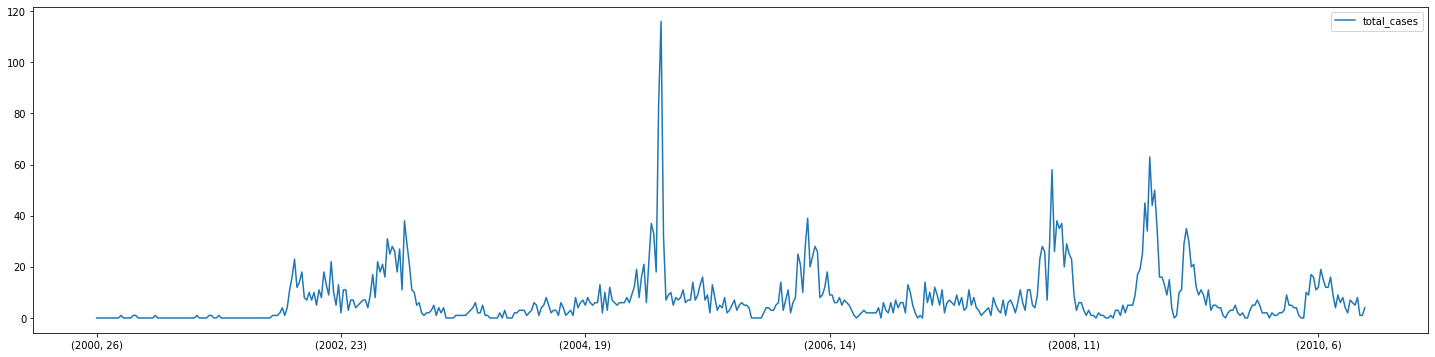

In [ ]:
iq_train_labels.plot(figsize=(25,6));

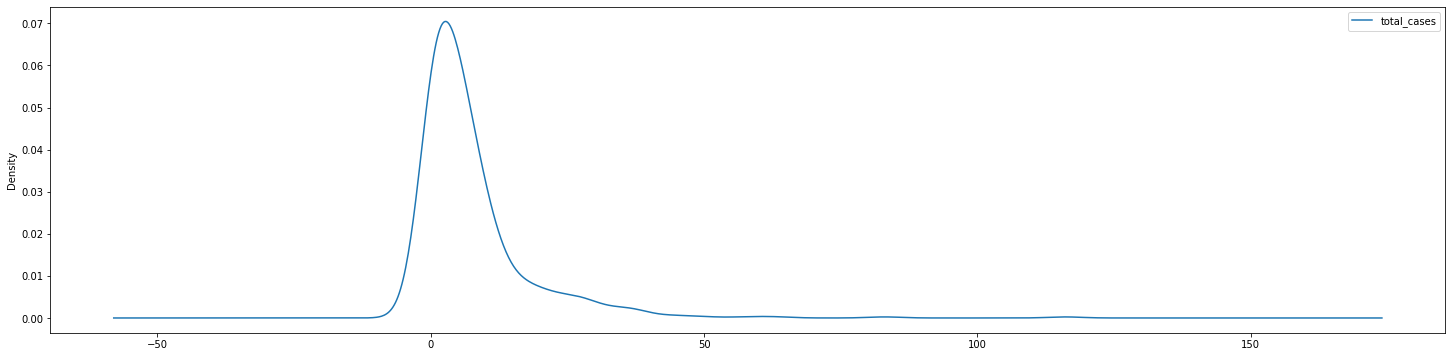

In [ ]:
iq_train_labels.plot.density(figsize=(25,6));

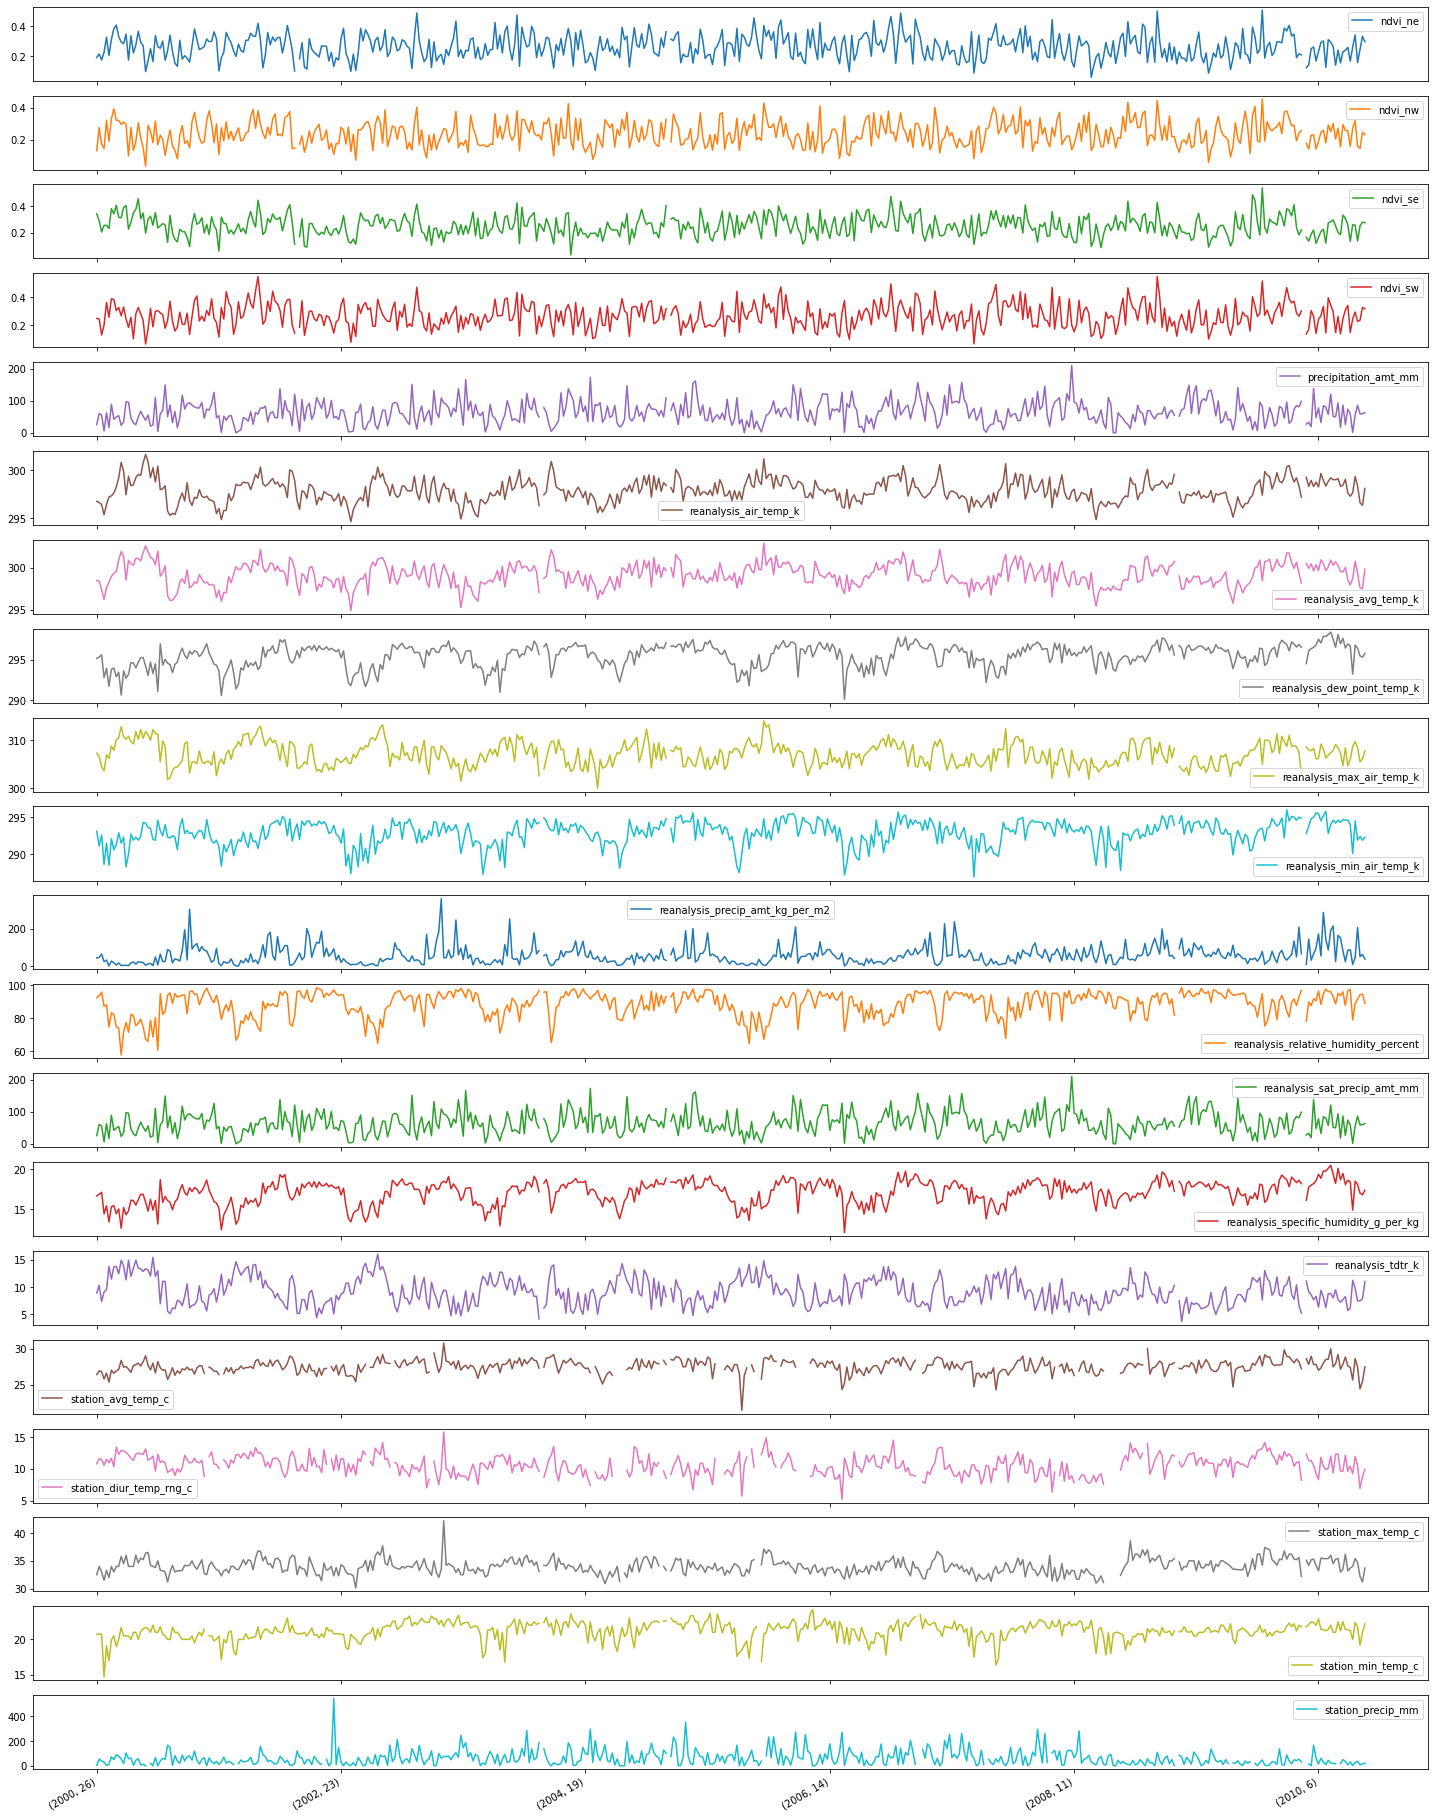

In [ ]:
iq_train_features.loc[:,iq_train_features.columns != 'week_start_date'].plot(figsize=(25,36),subplots=True);

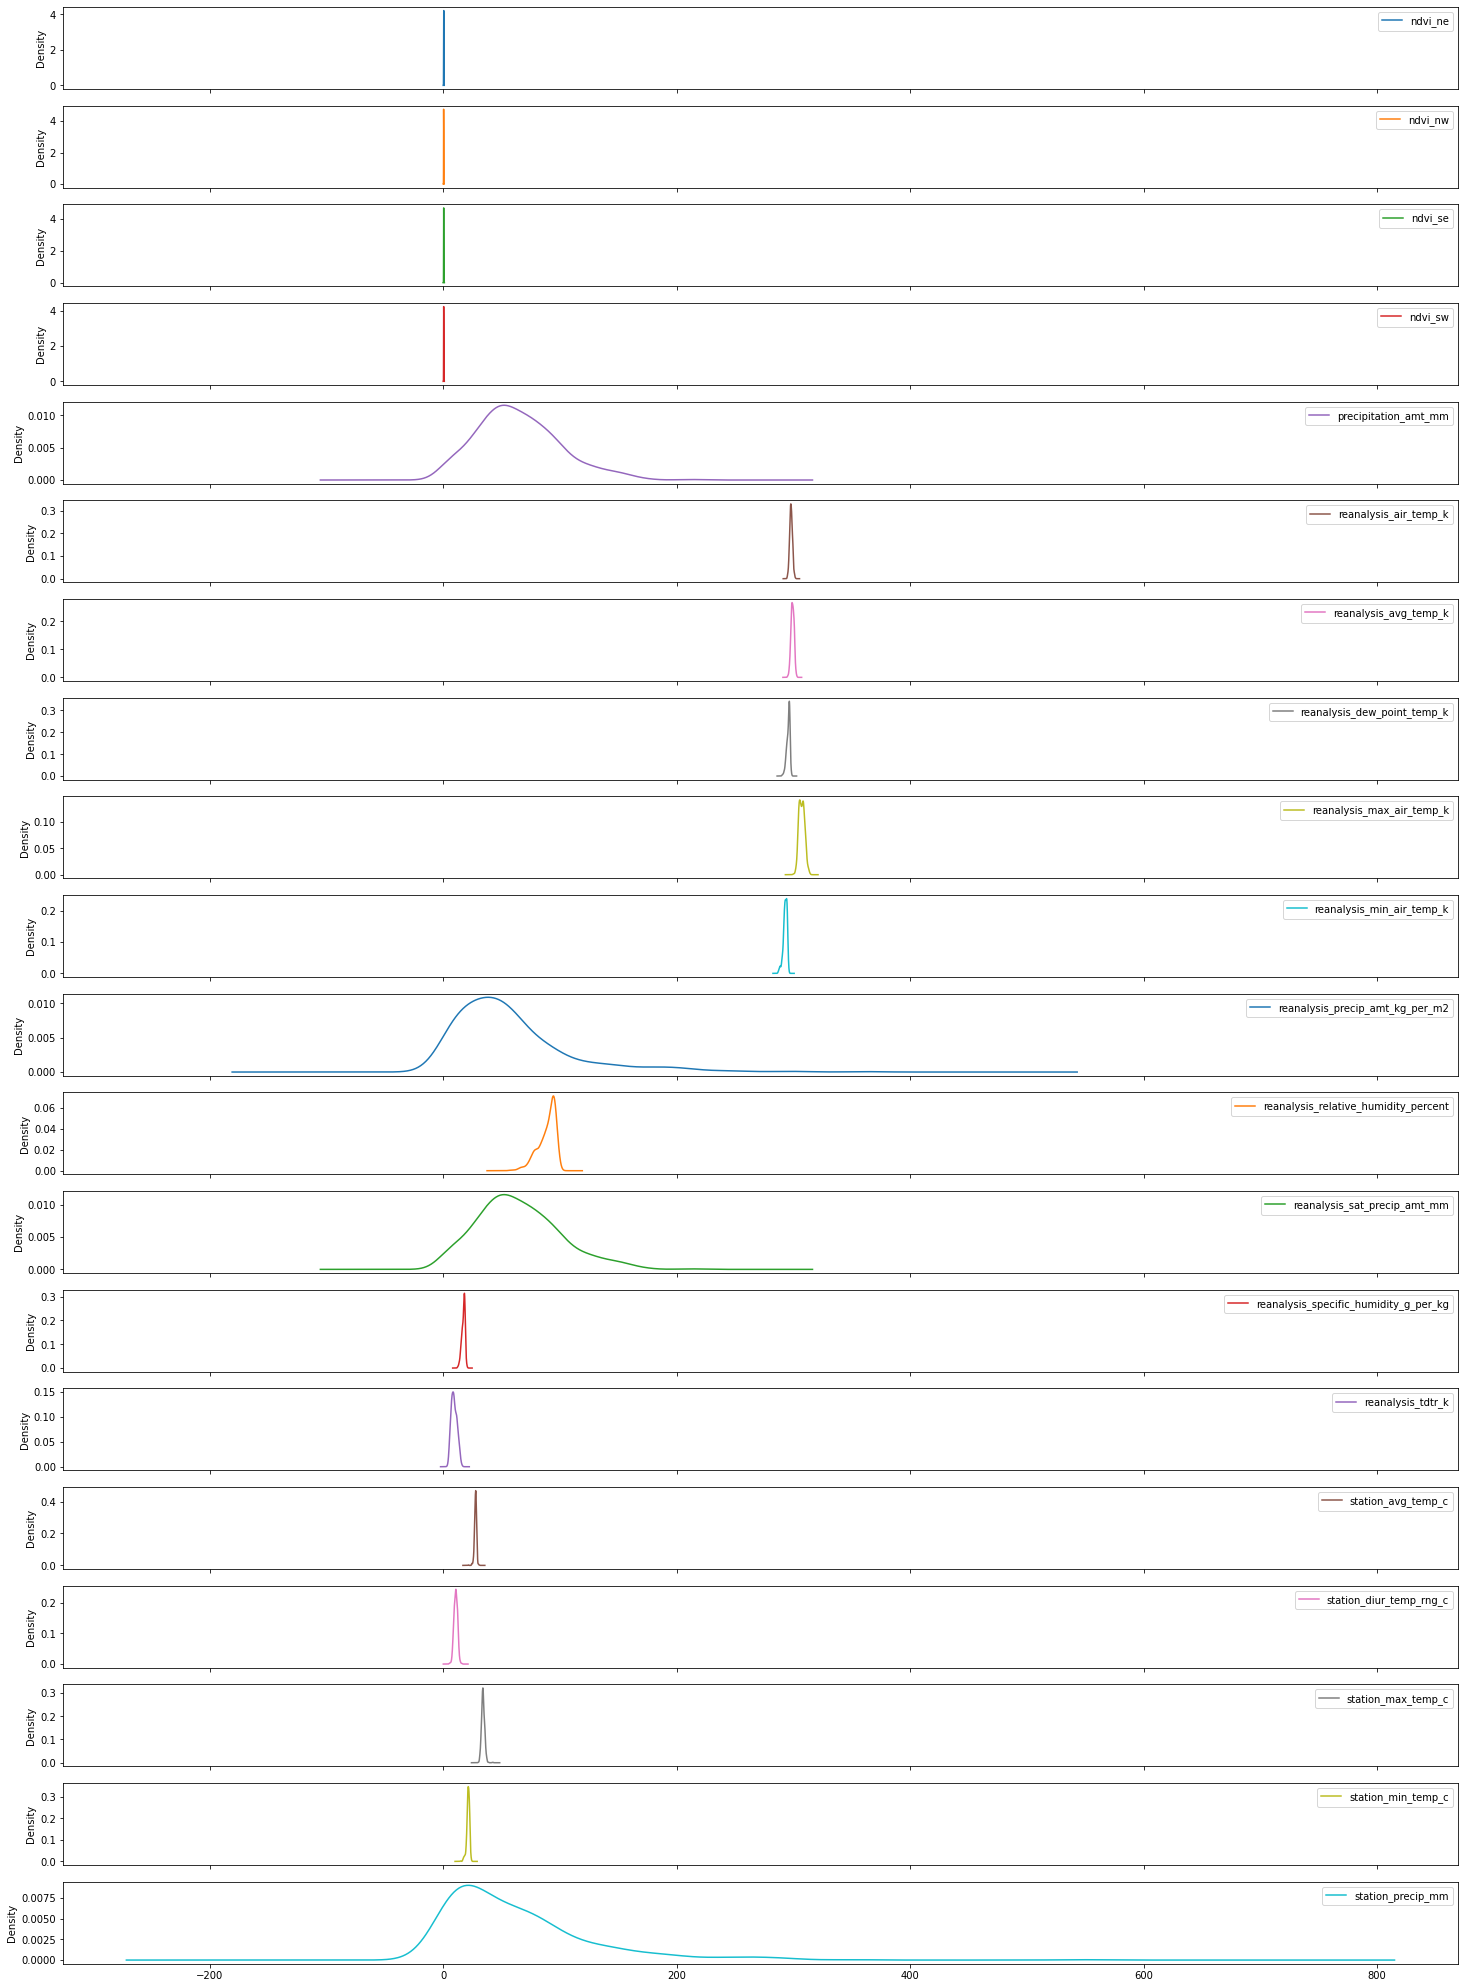

In [ ]:
iq_train_features.loc[:,iq_train_features.columns != 'week_start_date'].plot.density(figsize=(25,36),subplots=True);

In [ ]:
sj_train_features.isna().sum()

week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_min_temp_c                         6
station_precip_mm                          6
dtype: int64

In [ ]:
sj_train_features.fillna(method='ffill', inplace=True)
sj_train_features.isna().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

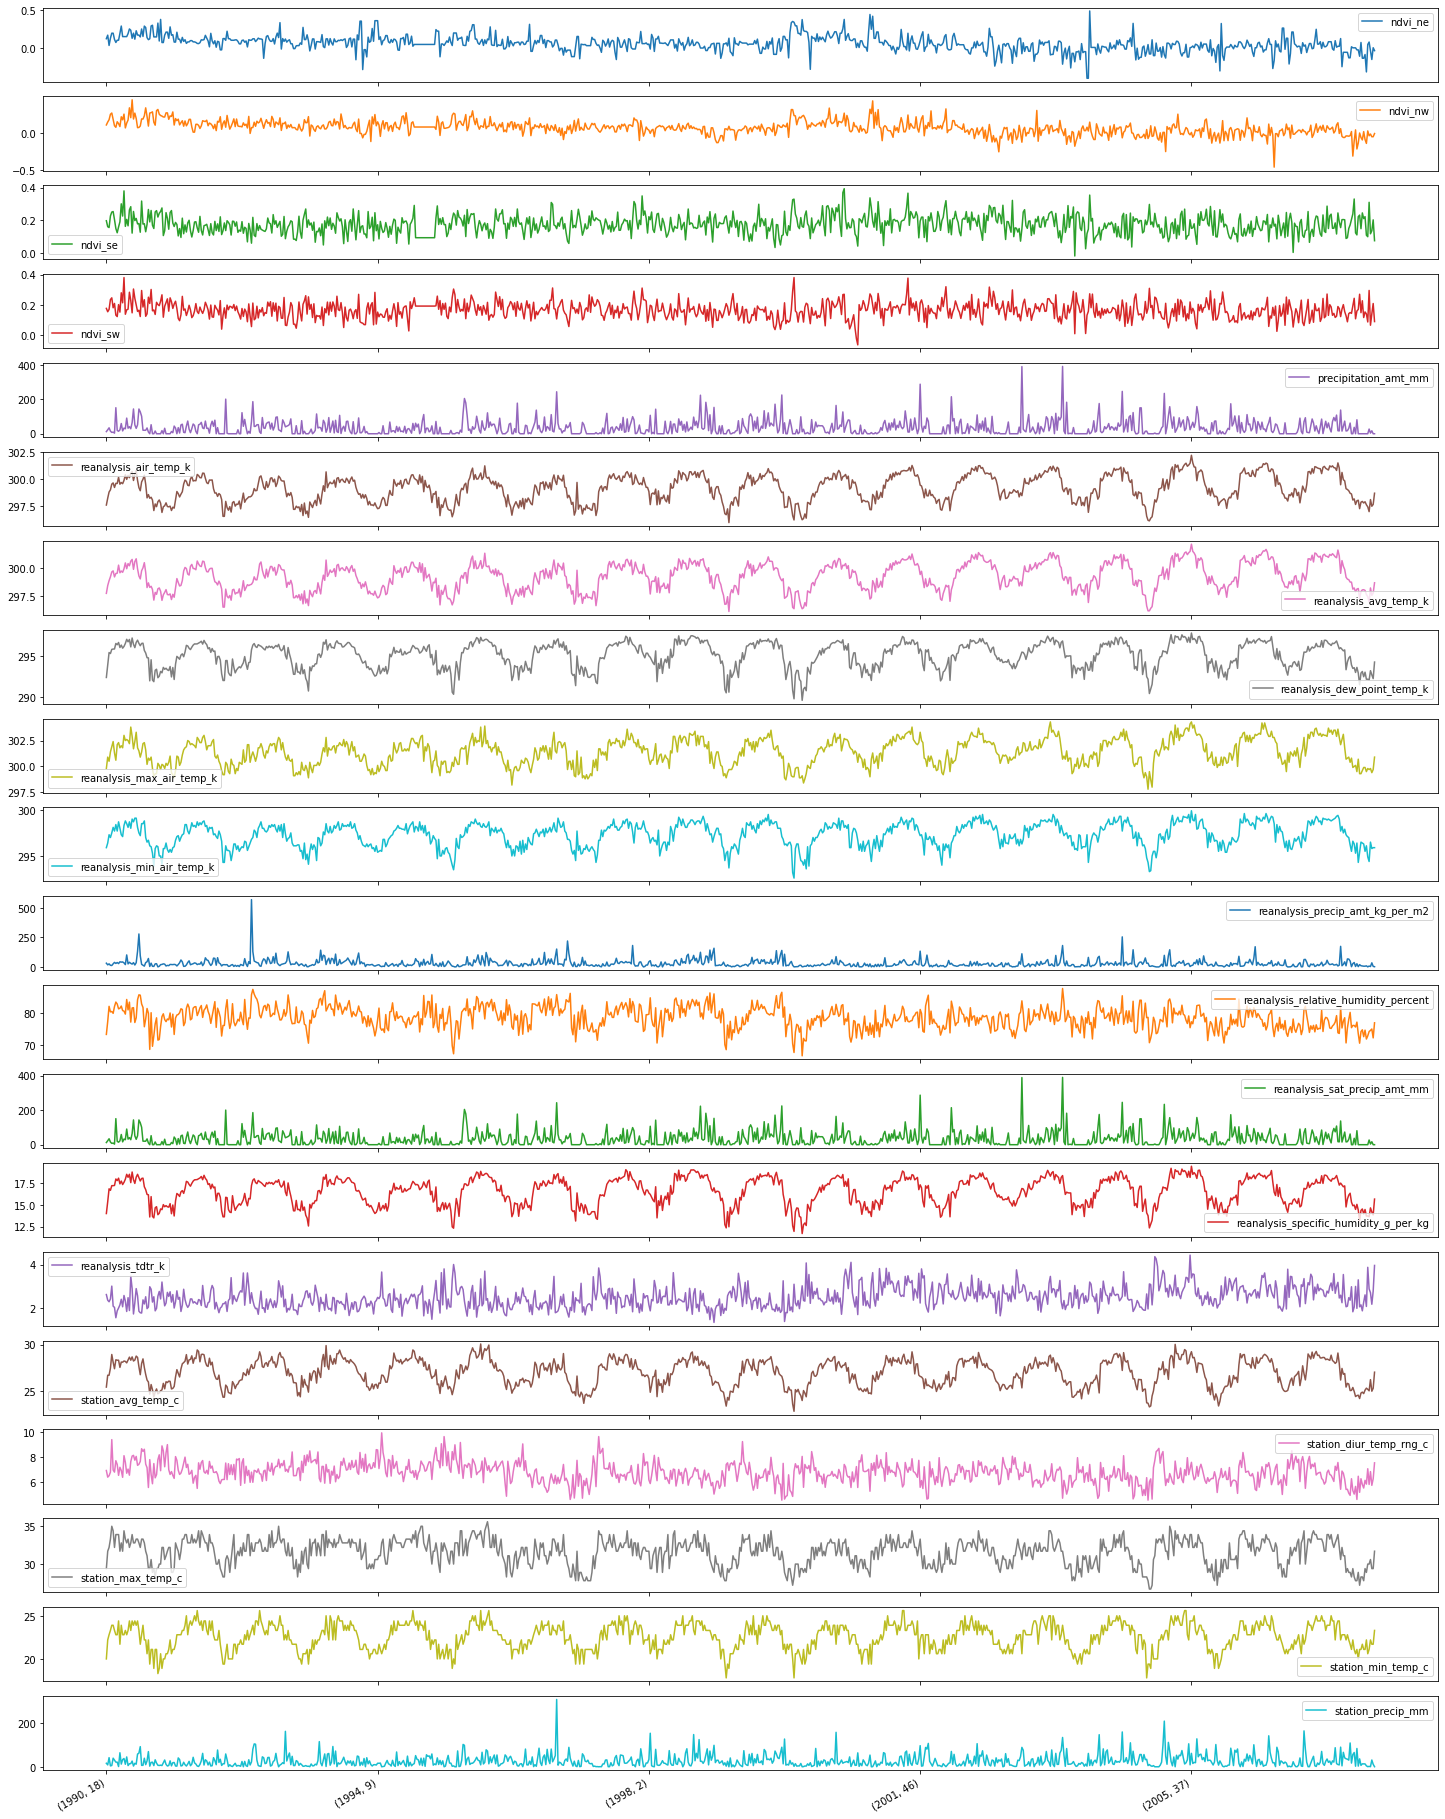

In [ ]:
sj_train_features.loc[:,sj_train_features.columns != 'week_start_date'].plot(figsize=(25,36),subplots=True);

In [ ]:
sj_train_labels.isna().sum()

total_cases    0
dtype: int64

In [ ]:
iq_train_features.isna().sum()

week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c                        8
station_precip_mm                        16
dtype: int64

In [ ]:
iq_train_features.fillna(method='ffill', inplace=True)
iq_train_features.isna().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

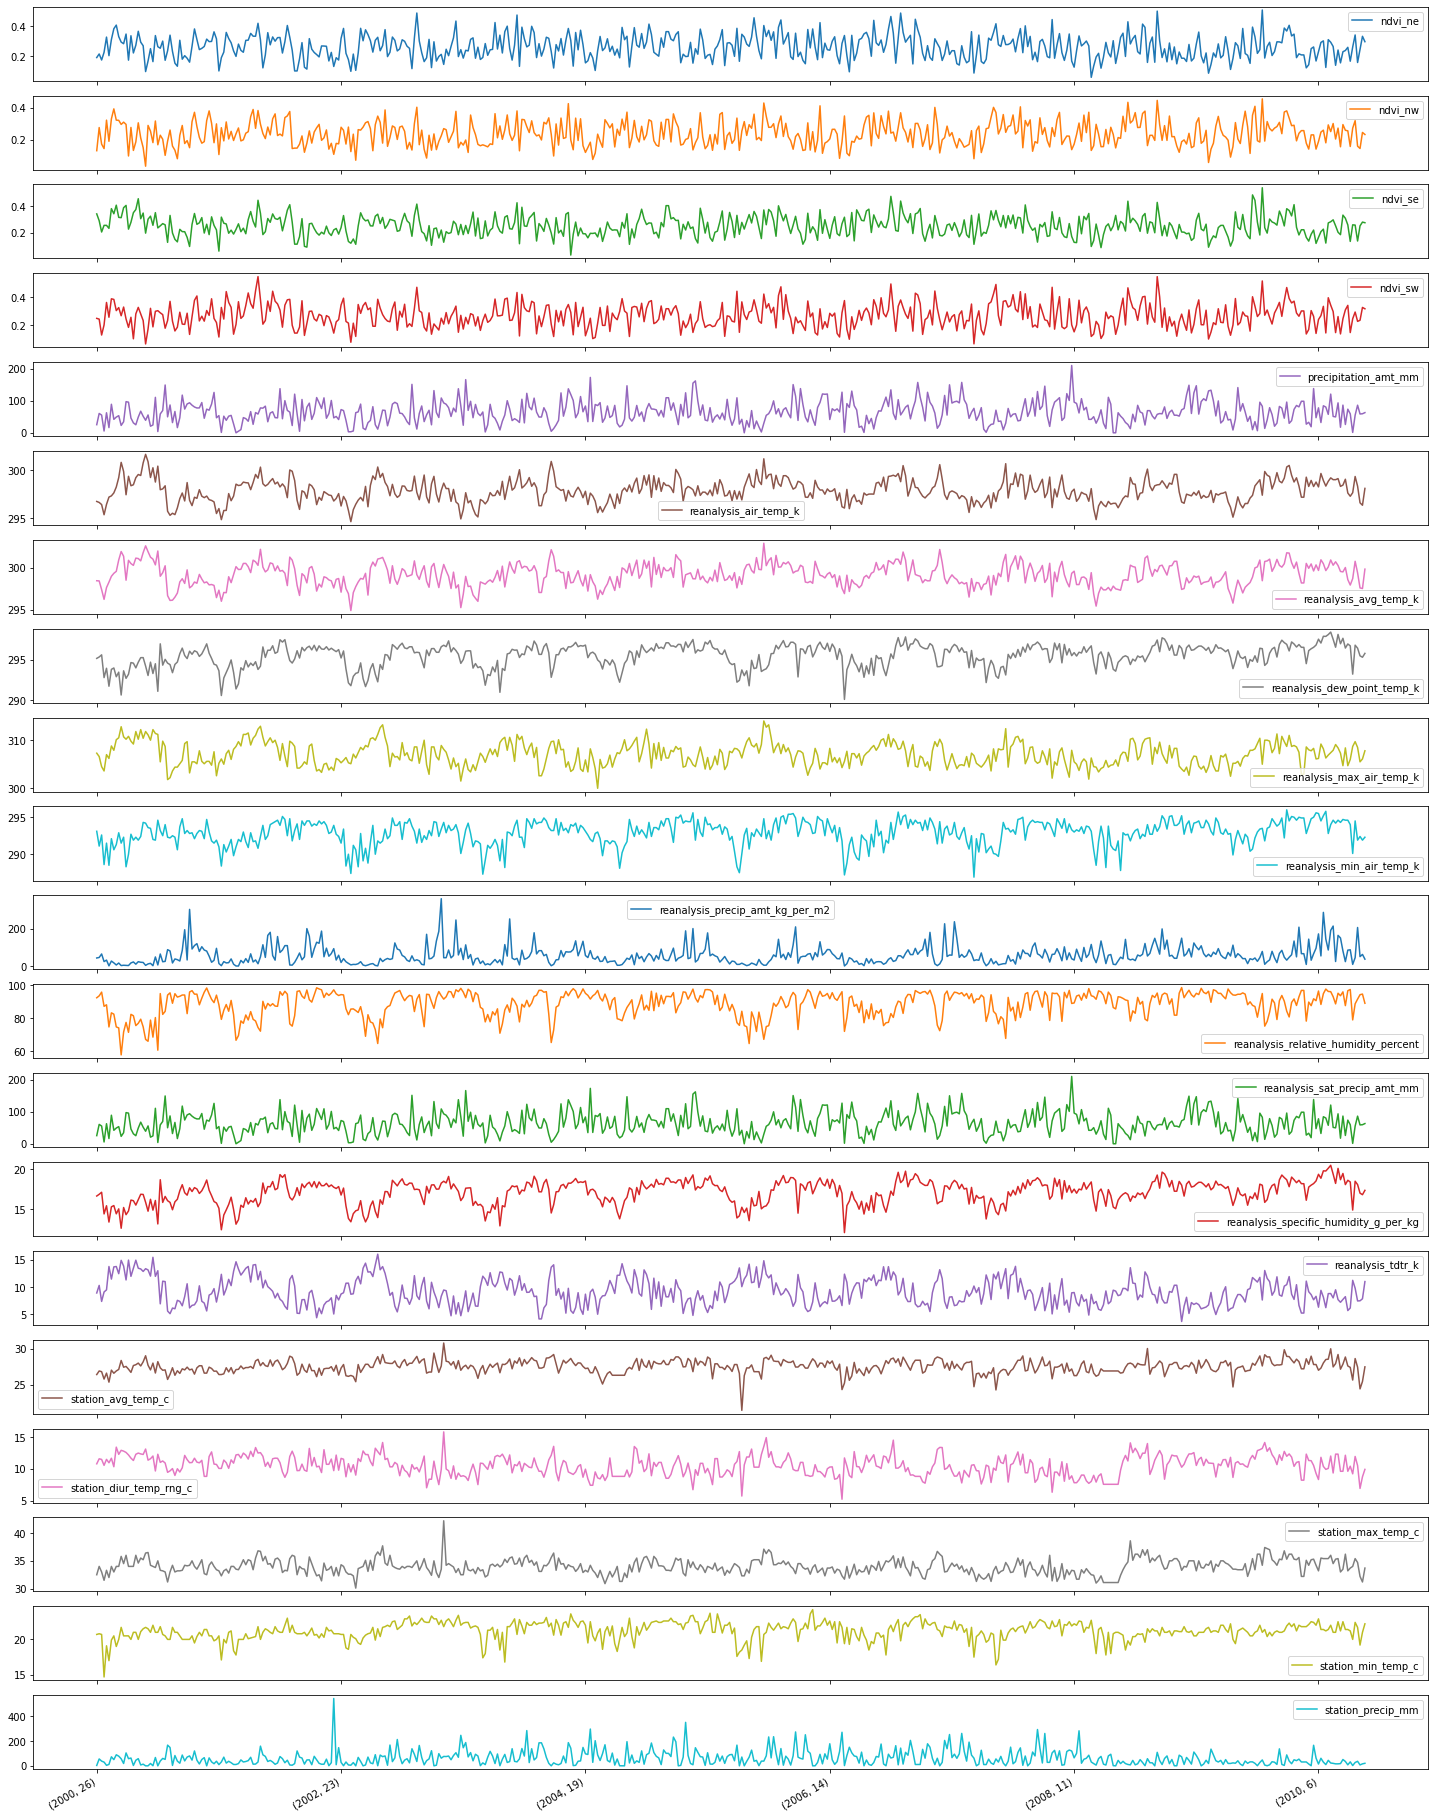

In [ ]:
iq_train_features.loc[:,iq_train_features.columns != 'week_start_date'].plot(figsize=(25,36),subplots=True);

In [ ]:
iq_train_labels.isna().sum()

total_cases    0
dtype: int64

In [ ]:
iq_train_features.columns.nunique()

21

# split training set and then standardize all data on using the mean and std

In [ ]:
def standardize(x, mean, std):
  return (x - mean) / std

def inv_standardize(x, mean, std):
  return (x * std) + mean

# TensorFlow section 
### LSTM model

In [ ]:
import gc

gc.collect()

43876

In [ ]:
# !pip install --upgrade tensorflow

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import tensorflow as tf

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
if tf.test.gpu_device_name() != '/device:GPU:0':
  print('WARNING: GPU device not found.')
else:
  print('SUCCESS: Found GPU: {}'.format(tf.test.gpu_device_name()))

SUCCESS: Found GPU: /device:GPU:0


In [ ]:
tf.__version__

'2.4.1'

In [ ]:
tf.random.set_seed(29)

In [ ]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

# San Juan predictions below

In [ ]:
data = sj_train_labels['total_cases']
data.index = sj_train_features['week_start_date']
data.head()

week_start_date
1990-04-30    4
1990-05-07    5
1990-05-14    4
1990-05-21    3
1990-05-28    6
Name: total_cases, dtype: int64

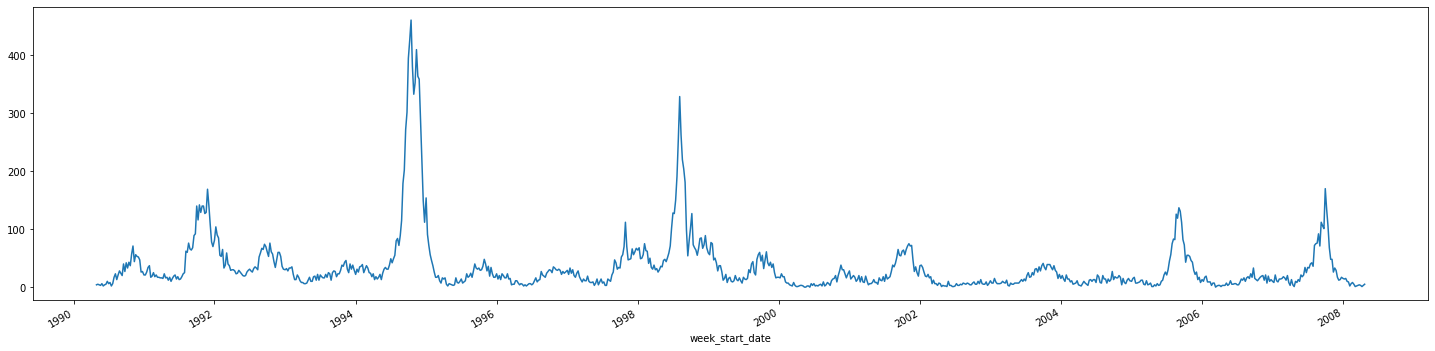

In [ ]:
data.plot(figsize=(25,6),subplots=True);

In [ ]:
TRAIN_SPLIT = len(data) - 260

In [ ]:
desc = data[:TRAIN_SPLIT].describe()
desc

count    676.000000
mean      38.656805
std       57.422081
min        0.000000
25%       10.000000
50%       23.000000
75%       42.250000
max      461.000000
Name: total_cases, dtype: float64

In [ ]:
data = data.values

In [ ]:
train_mean = np.array(desc.T['mean'])
train_std = np.array(desc.T['std'])

In [ ]:
data = standardize(data,train_mean,train_std)

In [ ]:
past_history = 156
future_target = 0

x_train, y_train = univariate_data(data, 0, TRAIN_SPLIT, past_history, future_target)
x_val, y_val = univariate_data(data, TRAIN_SPLIT, None, past_history, future_target)

In [ ]:
print ('Single window of past history')
print (x_train[0])
print ('\n Target to predict')
print (y_train[0])
print("x_train shape:{}".format(x_train.shape))
print("y_train shape:{}".format(y_train.shape))
print("x_val shape:{}".format(x_val.shape))
print("y_val shape:{}".format(y_val.shape))

Single window of past history
[[-0.60354491]
 [-0.58613001]
 [-0.60354491]
 [-0.62095981]
 [-0.5687151 ]
 [-0.63837472]
 [-0.60354491]
 [-0.58613001]
 [-0.49905549]
 [-0.5687151 ]
 [-0.5338853 ]
 [-0.63837472]
 [-0.5687151 ]
 [-0.37715117]
 [-0.27266174]
 [-0.44681078]
 [-0.30749155]
 [-0.18558723]
 [-0.25524684]
 [-0.32490645]
 [ 0.02339162]
 [-0.20300213]
 [ 0.05822142]
 [-0.09851271]
 [ 0.07563633]
 [-0.02885309]
 [ 0.31944498]
 [ 0.56325363]
 [ 0.09305123]
 [ 0.30203007]
 [ 0.24978536]
 [ 0.23237046]
 [ 0.14529594]
 [-0.22041703]
 [-0.20300213]
 [-0.30749155]
 [-0.30749155]
 [-0.22041703]
 [-0.08109781]
 [-0.02885309]
 [-0.37715117]
 [-0.34232136]
 [-0.23783194]
 [-0.35973626]
 [-0.30749155]
 [-0.37715117]
 [-0.37715117]
 [-0.39456607]
 [-0.39456607]
 [-0.41198097]
 [-0.27266174]
 [-0.39456607]
 [-0.37715117]
 [-0.46422568]
 [-0.37715117]
 [-0.49905549]
 [-0.41198097]
 [-0.34232136]
 [-0.30749155]
 [-0.42939588]
 [-0.35973626]
 [-0.44681078]
 [-0.42939588]
 [-0.35973626]
 [-0.27266

In [ ]:
def create_time_steps(length):
  return list(range(-length, 0))

In [ ]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0
  plt.figure(figsize=(20,6))
  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

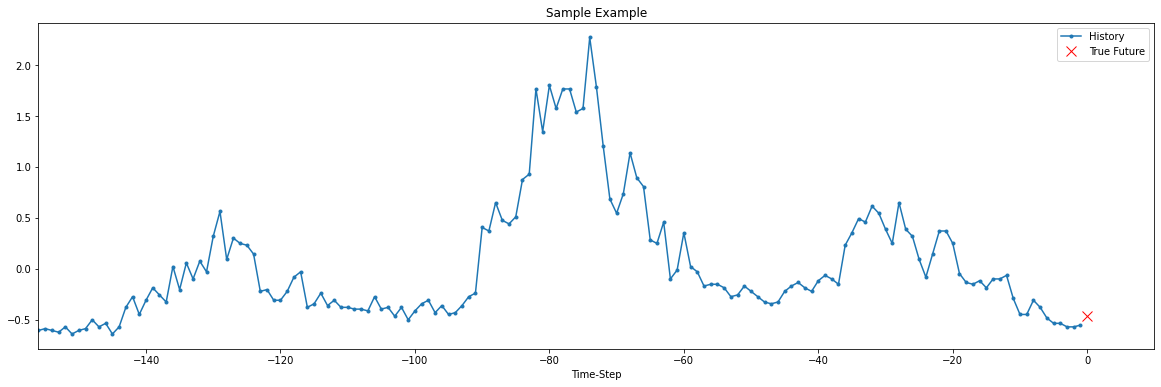

In [ ]:
show_plot([x_train[0], y_train[0]], 0, 'Sample Example');

In [ ]:
def baseline(history):
  return np.mean(history)

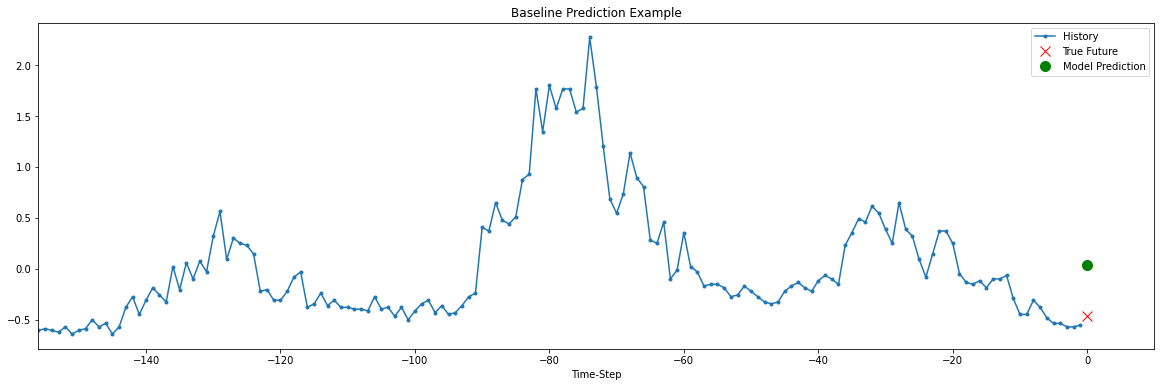

In [ ]:
show_plot([x_train[0], y_train[0], baseline(x_train[0])], 0,
           'Baseline Prediction Example');

In [ ]:
BATCH_SIZE = 10000
# BUFFER_SIZE = .shuffle(BUFFER_SIZE)

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_data = val_data.batch(BATCH_SIZE).repeat()

In [ ]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, input_shape=x_train.shape[-2:], activation='elu'),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [ ]:
for x, y in val_data.take(1):
    print(simple_lstm_model.predict(x).shape)

(156, 1)


In [ ]:
EVALUATION_INTERVAL = TRAIN_SPLIT
EPOCHS = 5

single_step_history = simple_lstm_model.fit(train_data, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_data, validation_steps=260)

Epoch 1/5
676/676 [==============================] - 142s 209ms/step - loss: 0.2603 - val_loss: 0.1443
Epoch 2/5
676/676 [==============================] - 139s 206ms/step - loss: 0.1077 - val_loss: 0.1502
Epoch 3/5
676/676 [==============================] - 138s 204ms/step - loss: 519826742.6171 - val_loss: 0.1773
Epoch 4/5
676/676 [==============================] - 136s 201ms/step - loss: 0.2532 - val_loss: 0.1772
Epoch 5/5
676/676 [==============================] - 140s 207ms/step - loss: 0.2526 - val_loss: 0.1768


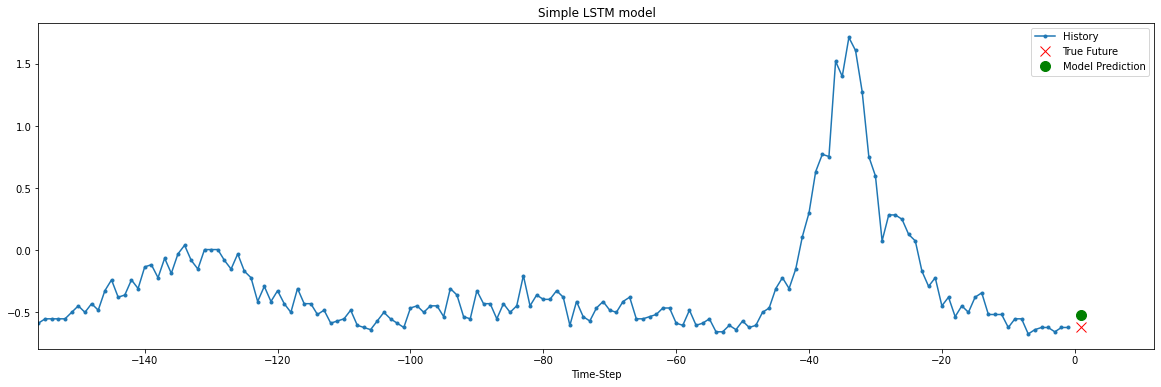

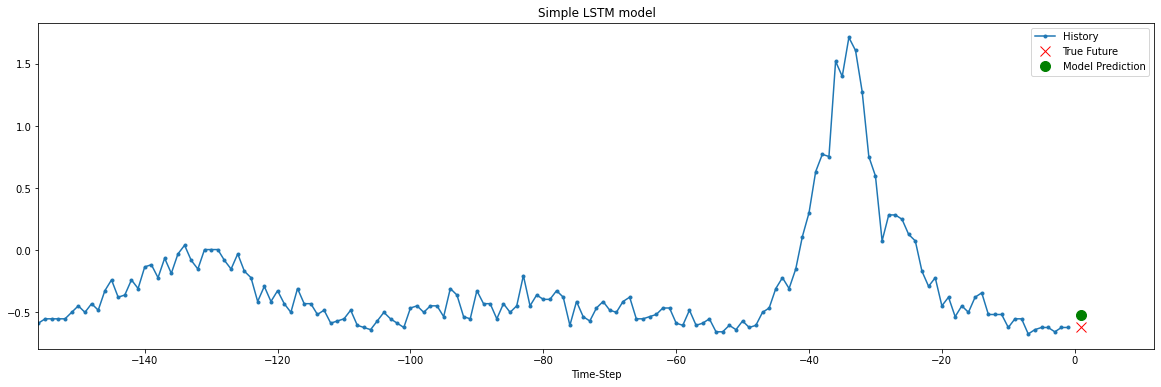

In [ ]:
for x, y in val_data.take(1):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 1, 'Simple LSTM model')
  plot.show()

In [ ]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure(figsize=(25,6))

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

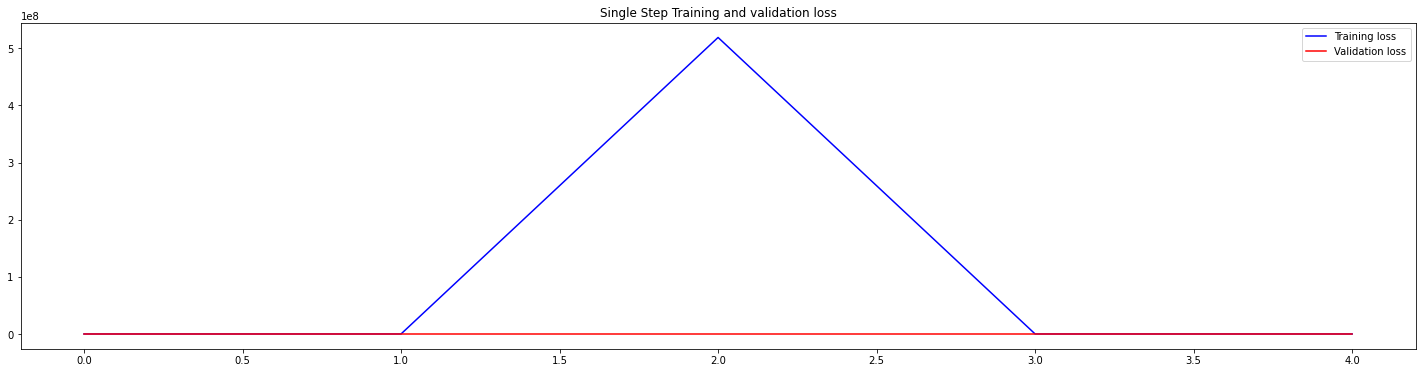

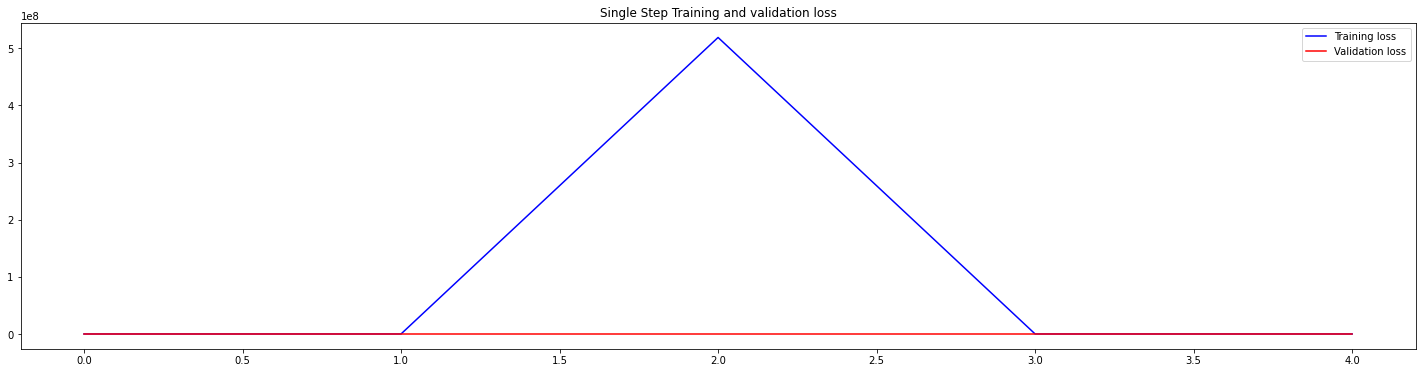

In [ ]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [ ]:
sj_train_features.head()

week_start_date   ndvi_ne  ...  station_min_temp_c  station_precip_mm
(1990, 18)      1990-04-30  0.122600  ...                20.0               16.0
(1990, 19)      1990-05-07  0.169900  ...                22.2                8.6
(1990, 20)      1990-05-14  0.032250  ...                22.8               41.4
(1990, 21)      1990-05-21  0.128633  ...                23.3                4.0
(1990, 22)      1990-05-28  0.196200  ...                23.9                5.8

[5 rows x 21 columns]

week_start_date   ndvi_ne  ...  station_min_temp_c  station_precip_mm
(1990, 18)      1990-04-30  0.122600  ...                20.0               16.0
(1990, 19)      1990-05-07  0.169900  ...                22.2                8.6
(1990, 20)      1990-05-14  0.032250  ...                22.8               41.4
(1990, 21)      1990-05-21  0.128633  ...                23.3                4.0
(1990, 22)      1990-05-28  0.196200  ...                23.9                5.8

[5 rows x 21 columns]

In [ ]:
sj_train_features.loc[:,'month'] = sj_train_features.week_start_date.dt.month

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
[*sj_train_features.columns]

['week_start_date',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 'month']

['week_start_date',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 'month']

In [ ]:
features_considered = ['month']
#  'precipitation_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_air_temp_k',

In [ ]:
len(sj_train_features[features_considered]),len(sj_train_labels)

In [ ]:
features = sj_train_features[features_considered]
features.loc[:,'total_cases'] = sj_train_labels.values
features.index = sj_train_features['week_start_date']
features.head()

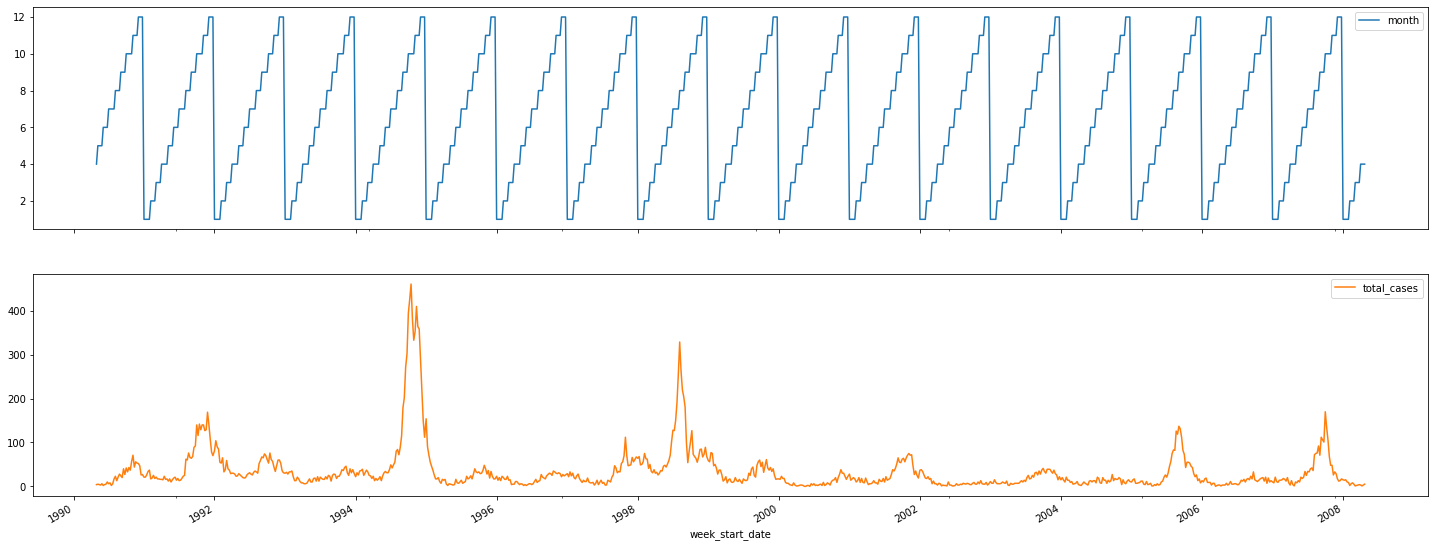

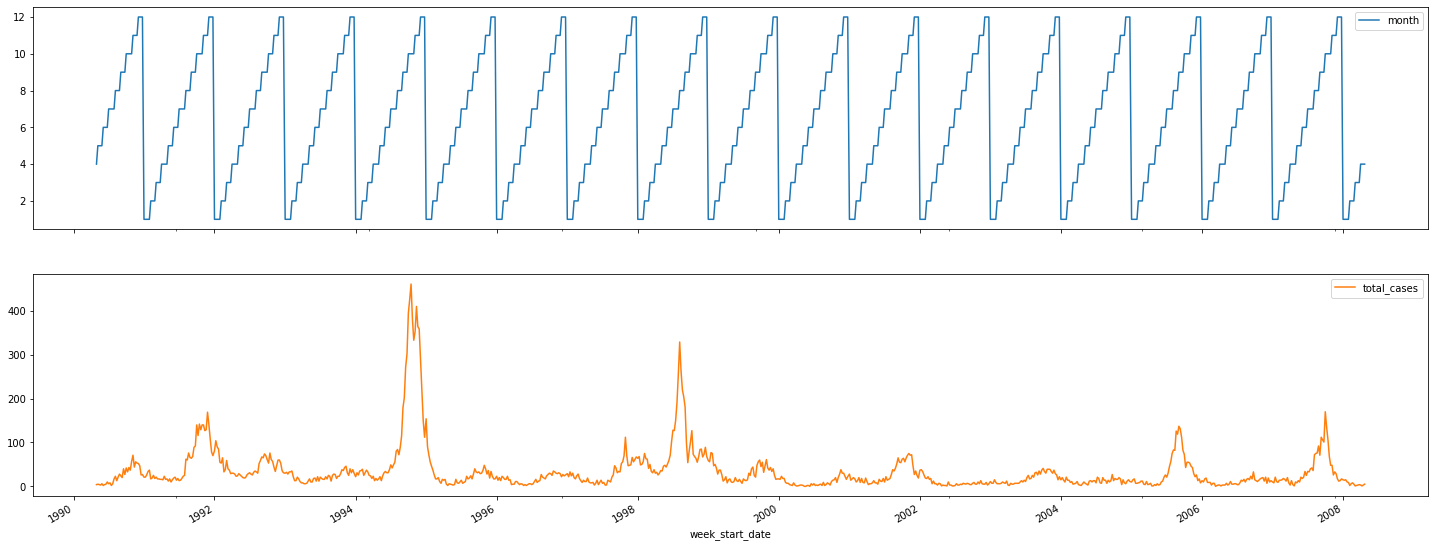

In [ ]:
features.plot(subplots=True, figsize=(25,10));

In [ ]:
desc = features[:TRAIN_SPLIT].describe()
desc

month  total_cases
count  676.000000   676.000000
mean     6.418639    38.656805
std      3.453506    57.422081
min      1.000000     0.000000
25%      3.750000    10.000000
50%      6.500000    23.000000
75%      9.000000    42.250000
max     12.000000   461.000000

month  total_cases
count  676.000000   676.000000
mean     6.418639    38.656805
std      3.453506    57.422081
min      1.000000     0.000000
25%      3.750000    10.000000
50%      6.500000    23.000000
75%      9.000000    42.250000
max     12.000000   461.000000

In [ ]:
dataset = features.values
data_mean = np.array(desc.T['mean'])
data_std = np.array(desc.T['std'])
data_mean,data_std

(array([ 6.41863905, 38.65680473]), array([ 3.45350603, 57.42208091]))

(array([ 6.41863905, 38.65680473]), array([ 3.45350603, 57.42208091]))

In [ ]:
dataset[:3,:]

array([[4, 4],
       [5, 5],
       [5, 4]])

array([[4, 4],
       [5, 5],
       [5, 4]])

In [ ]:
dataset = standardize(dataset,data_mean,data_std)

In [ ]:
dataset[:3,],dataset.shape

(array([[-0.70034308, -0.60354491],
        [-0.41078227, -0.58613001],
        [-0.41078227, -0.60354491]]), (936, 2))

(array([[-0.70034308, -0.60354491],
        [-0.41078227, -0.58613001],
        [-0.41078227, -0.60354491]]), (936, 2))

In [ ]:
past_history = 156
future_target = 52
STEP = 52
target_col = -1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, target_col], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, target_col],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [ ]:
dataset[:3, target_col]

array([-0.60354491, -0.58613001, -0.60354491])

array([-0.60354491, -0.58613001, -0.60354491])

In [ ]:
print ('Single window of past history : {} {}'.format(x_train_single[0],x_train_single.shape))

Single window of past history : [[-0.70034308 -0.60354491]
 [-0.70034308 -0.37715117]
 [-0.70034308 -0.25524684]] (520, 3, 2)
Single window of past history : [[-0.70034308 -0.60354491]
 [-0.70034308 -0.37715117]
 [-0.70034308 -0.25524684]] (520, 3, 2)


In [ ]:
# .shuffle(BUFFER_SIZE)

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [ ]:
single_step_model = tf.keras.models.Sequential([
                                                tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]),
                                                tf.keras.layers.Dense(1)
                                              ])

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [ ]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

(52, 1)
(52, 1)


In [ ]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=52)

Epoch 1/5
Epoch 1/5
676/676 [==============================] - 4s 4ms/step - loss: 0.4382 - val_loss: 0.4333
Epoch 2/5
676/676 [==============================] - 2s 4ms/step - loss: 0.3473 - val_loss: 0.4897
Epoch 3/5
676/676 [==============================] - 2s 4ms/step - loss: 0.2945 - val_loss: 0.4984
Epoch 4/5
676/676 [==============================] - 2s 4ms/step - loss: 0.2724 - val_loss: 0.5133
Epoch 5/5
676/676 [==============================] - 2s 4ms/step - loss: 0.2434 - val_loss: 0.5287


In [ ]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

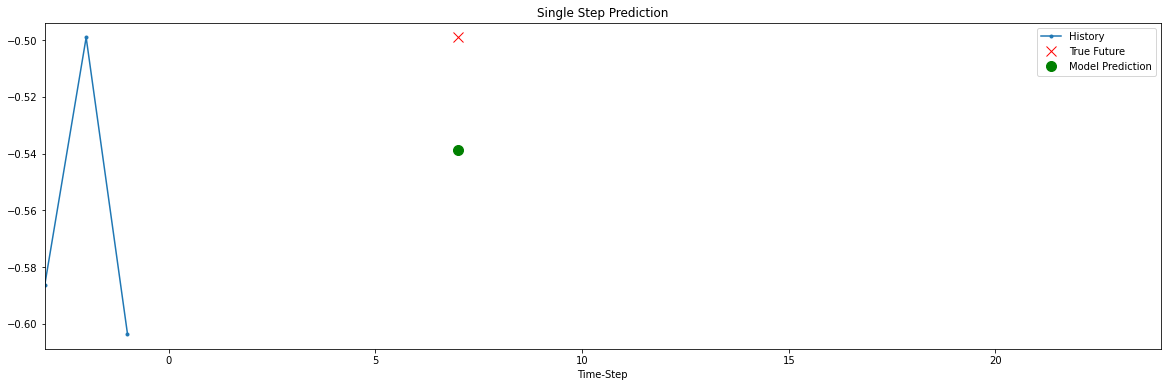

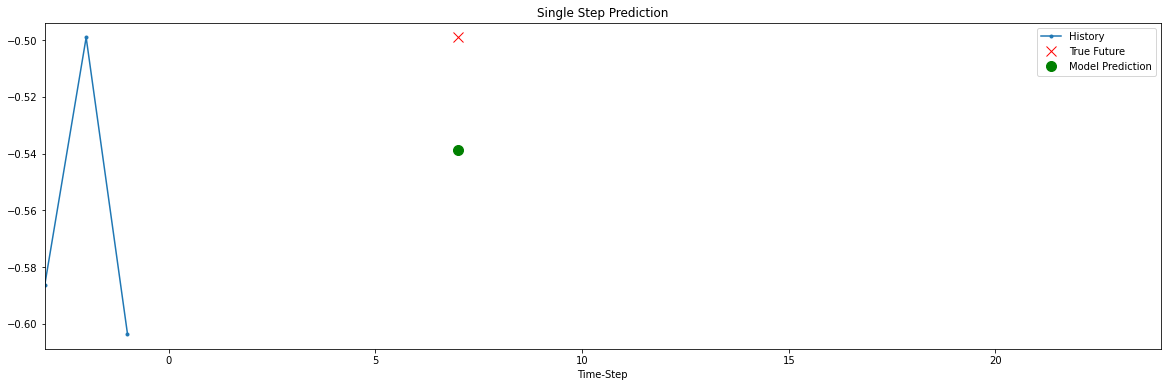

In [ ]:
for x, y in val_data_single.take(1):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 7,
                   'Single Step Prediction')
  plot.show()

In [ ]:
future_target = 52
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, target_col], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, target_col],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [ ]:
print ('Single window of past history and shape : {} \n {}'.format(x_train_multi[0],x_train_multi[0].shape))
print ('\n Target to predict and shape : {} \n {}'.format(y_train_multi[0],y_train_multi[0].shape))

Single window of past history and shape : [[-0.70034308 -0.60354491]
 [-0.70034308 -0.37715117]
 [-0.70034308 -0.25524684]] 
 (3, 2)

 Target to predict and shape : [-0.46422568 -0.37715117 -0.49905549 -0.49905549 -0.35973626 -0.34232136
 -0.46422568 -0.29007665 -0.46422568 -0.30749155 -0.35973626 -0.39456607
 -0.39456607 -0.29007665 -0.37715117 -0.23783194 -0.27266174 -0.46422568
 -0.23783194 -0.18558723 -0.20300213 -0.35973626 -0.27266174 -0.27266174
 -0.16817232 -0.01143819 -0.046268    0.07563633  0.12788104 -0.13334252
 -0.23783194  0.02339162 -0.13334252 -0.01143819 -0.15075742 -0.29007665
 -0.13334252 -0.22041703 -0.0636829  -0.046268    0.00597671 -0.23783194
 -0.13334252 -0.02885309 -0.09851271 -0.23783194 -0.25524684 -0.35973626
 -0.27266174 -0.44681078 -0.35973626 -0.42939588] 
 (52,)
Single window of past history and shape : [[-0.70034308 -0.60354491]
 [-0.70034308 -0.37715117]
 [-0.70034308 -0.25524684]] 
 (3, 2)

 Target to predict and shape : [-0.46422568 -0.37715117 -0.

In [ ]:
# .shuffle(BUFFER_SIZE)

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [ ]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(25, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), 'b', label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'b',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'r',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

In [ ]:
multi_step_model = tf.keras.models.Sequential([
                                               tf.keras.layers.LSTM(32, return_sequences=True, input_shape=x_train_multi.shape[-2:]),
                                               tf.keras.layers.LSTM(32, activation='relu'),
                                               tf.keras.layers.Dense(future_target)
                                             ])

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.1), loss='mae')

In [ ]:
for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)

(52, 52)
(52, 52)


In [ ]:
EPOCHS = 7
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=future_target)

Epoch 1/7
Epoch 1/7
676/676 [==============================] - 9s 11ms/step - loss: 0.4667 - val_loss: 0.3283
Epoch 2/7
676/676 [==============================] - 7s 10ms/step - loss: 0.4050 - val_loss: 0.3392
Epoch 3/7
676/676 [==============================] - 7s 10ms/step - loss: 0.3825 - val_loss: 0.3468
Epoch 4/7
676/676 [==============================] - 7s 10ms/step - loss: 0.3608 - val_loss: 0.3618
Epoch 5/7
676/676 [==============================] - 7s 10ms/step - loss: 0.3399 - val_loss: 0.3606
Epoch 6/7
676/676 [==============================] - 7s 10ms/step - loss: 0.3206 - val_loss: 0.3567
Epoch 7/7
676/676 [==============================] - 7s 10ms/step - loss: 0.3056 - val_loss: 0.3641


In [ ]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

In [ ]:
for x, y in val_data_multi.take(1):
  multi_step_plot(x[-1], y[-1], multi_step_model.predict(x)[-1])

In [ ]:
sj_pred_ = inv_standardize(multi_step_model.predict(x)[-1], data_mean[target_col], data_std[target_col]).astype('int64')
sj_pred_

In [ ]:
sj_mae = mae(sj_train_labels[-52:].values, sj_pred_)
print(sj_mae)

In [ ]:
sj_predictions = pd.DataFrame(sj_pred_, index=features.index[-future_target:], columns=['TensorFlow_Predictions'])
sj_predictions.head()

In [ ]:
sj_predictions.to_csv('sj_predictions.csv')

# Iquitos predictions below


In [ ]:
data = iq_train_labels['total_cases']
data.index = iq_train_features['week_start_date']
data.head()

In [ ]:
data.plot(figsize=(25,6),subplots=True);

In [ ]:
TRAIN_SPLIT = len(data) - 208

In [ ]:
desc = data[:TRAIN_SPLIT].describe()
desc

In [ ]:
data = data.values

In [ ]:
train_mean = np.array(desc.T['mean'])
train_std = np.array(desc.T['std'])

In [ ]:
data = standardize(data,train_mean,train_std)

In [ ]:
past_history = 52
future_target = 0

x_train, y_train = univariate_data(data, 0, TRAIN_SPLIT, past_history, future_target)
x_val, y_val = univariate_data(data, TRAIN_SPLIT, None, past_history, future_target)

In [ ]:
print ('Single window of past history')
print (x_train[0])
print ('\n Target to predict')
print (y_train[0])
print("x_train shape:{}".format(x_train.shape))
print("y_train shape:{}".format(y_train.shape))
print("x_val shape:{}".format(x_val.shape))
print("y_val shape:{}".format(y_val.shape))

In [ ]:
show_plot([x_train[0], y_train[0]], 0, 'Sample Example');

In [ ]:
show_plot([x_train[0], y_train[0], baseline(x_train[0])], 0,
           'Baseline Prediction Example');

In [ ]:
BATCH_SIZE = 10000
# BUFFER_SIZE = .shuffle(BUFFER_SIZE)

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_data = val_data.batch(BATCH_SIZE).repeat()

In [ ]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, input_shape=x_train.shape[-2:], activation='relu'),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [ ]:
for x, y in val_data.take(1):
    print(simple_lstm_model.predict(x).shape)

In [ ]:
EVALUATION_INTERVAL = TRAIN_SPLIT
EPOCHS = 5

single_step_history = simple_lstm_model.fit(train_data, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_data, validation_steps=26)

312/312 [==============================] - 25s 77ms/step - loss: 0.4159 - val_loss: 0.5490
Epoch 2/5
312/312 [==============================] - 24s 77ms/step - loss: 0.3240 - val_loss: 0.9719
Epoch 3/5
312/312 [==============================] - 24s 76ms/step - loss: 0.2946 - val_loss: 1.1137
Epoch 4/5
312/312 [==============================] - 24s 76ms/step - loss: 0.2705 - val_loss: 1.1151
Epoch 5/5
312/312 [==============================] - 23s 75ms/step - loss: 0.2491 - val_loss: 1.6722


In [ ]:
for x, y in val_data.take(1):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 1, 'Simple LSTM model')
  plot.show()

In [ ]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

In [ ]:
iq_train_features.head()

In [ ]:
iq_train_features.loc[:,'month'] = iq_train_features.week_start_date.dt.month

In [ ]:
[*iq_train_features.columns]

In [ ]:
features_considered = ['month']
# 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_air_temp_k', 'precipitation_amt_mm', 

In [ ]:
len(iq_train_features[features_considered]),len(iq_train_labels)

In [ ]:
features = iq_train_features[features_considered]
features.loc[:,'total_cases'] = iq_train_labels.values
features.index = iq_train_features['week_start_date']
features.head()

In [ ]:
features.plot(subplots=True, figsize=(25,10));


In [ ]:
desc = features[:TRAIN_SPLIT].describe()
desc

In [ ]:
dataset = features.values
data_mean = np.array(desc.T['mean'])
data_std = np.array(desc.T['std'])
data_mean,data_std

In [ ]:
dataset[:3,:]

In [ ]:
dataset = standardize(dataset,data_mean,data_std)

In [ ]:
dataset[:3,],dataset.shape

In [ ]:
past_history = 104
future_target = 52
STEP = 104
target_col = -1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, target_col], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, target_col],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [ ]:
dataset[:3, target_col]

array([-0.63204998, -0.63204998, -0.63204998])

In [ ]:
print ('Single window of past history : {} {}'.format(x_train_single[0],x_train_single.shape))

Single window of past history : [[ 0.16885066 -0.63204998]] (208, 1, 2)


In [ ]:
# .shuffle(BUFFER_SIZE)

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [ ]:
single_step_model = tf.keras.models.Sequential([
                                                tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]),
                                                tf.keras.layers.Dense(1)
                                              ])

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [ ]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

(52, 1)


In [ ]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=52)

Epoch 1/5
312/312 [==============================] - 3s 4ms/step - loss: 0.4600 - val_loss: 0.2777
Epoch 2/5
312/312 [==============================] - 1s 3ms/step - loss: 0.4462 - val_loss: 0.2610
Epoch 3/5
312/312 [==============================] - 1s 3ms/step - loss: 0.4421 - val_loss: 0.2511
Epoch 4/5
312/312 [==============================] - 1s 3ms/step - loss: 0.4380 - val_loss: 0.2504
Epoch 5/5
312/312 [==============================] - 1s 3ms/step - loss: 0.4329 - val_loss: 0.2618


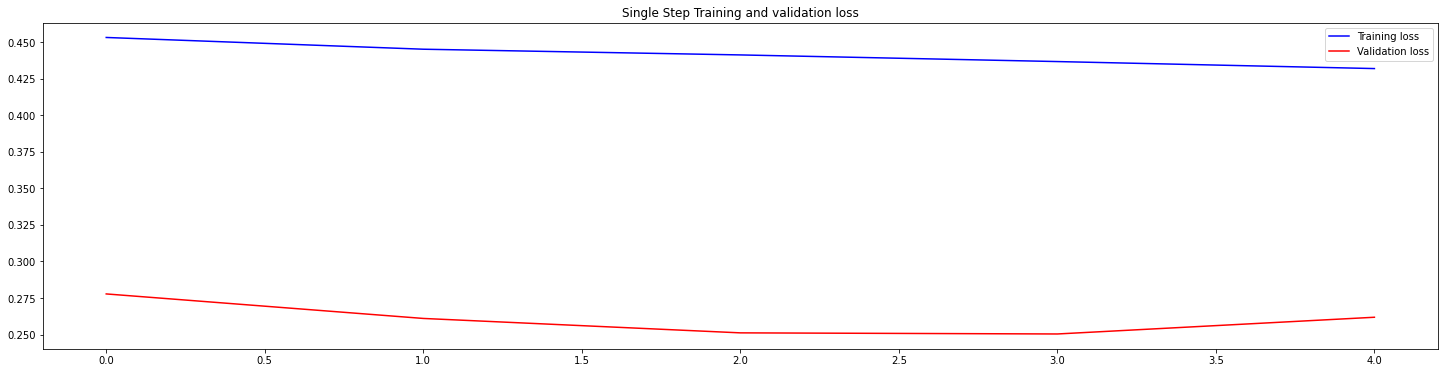

In [ ]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

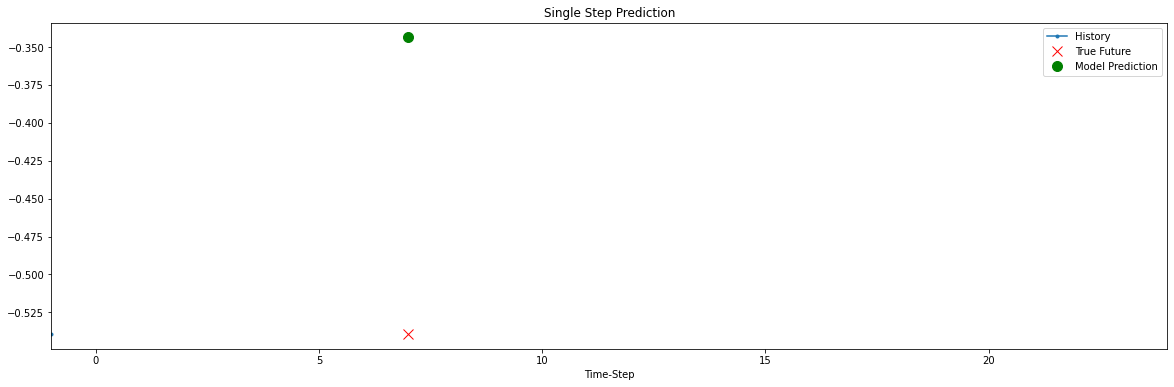

In [ ]:
for x, y in val_data_single.take(1):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 7,
                   'Single Step Prediction')
  plot.show()

In [ ]:
future_target = 52
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, target_col], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, target_col],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [ ]:
print ('Single window of past history and shape : {} \n {}'.format(x_train_multi[0],x_train_multi[0].shape))
print ('\n Target to predict and shape : {} \n {}'.format(y_train_multi[0],y_train_multi[0].shape))

Single window of past history and shape : [[ 0.16885066 -0.63204998]] 
 (1, 2)

 Target to predict and shape : [ 0.01724313  0.01724313 -0.26102534 -0.16826919 -0.07551303  0.01724313
  0.01724313 -0.26102534  0.20275545  0.94480472  0.10999929  1.40858551
  1.03756088  1.31582936  0.85204856  2.24339094  1.68685399  1.96512247
  1.77961015  1.03756088  1.87236631  0.38826777  2.89268406  2.05787863
  1.31582936  0.38826777  0.29551161 -0.16826919 -0.07551303 -0.44653766
 -0.53929382 -0.44653766 -0.44653766 -0.3537815  -0.16826919 -0.53929382
 -0.26102534 -0.44653766 -0.26102534 -0.63204998 -0.63204998 -0.63204998
 -0.63204998 -0.53929382 -0.53929382 -0.53929382 -0.53929382 -0.53929382
 -0.44653766 -0.3537815  -0.26102534 -0.07551303] 
 (52,)


In [ ]:
# .shuffle(BUFFER_SIZE)

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [ ]:
multi_step_model = tf.keras.models.Sequential([
                                               tf.keras.layers.LSTM(32, return_sequences=True, input_shape=x_train_multi.shape[-2:]),
                                               tf.keras.layers.LSTM(16, activation='elu'),
                                               tf.keras.layers.Dense(future_target)
                                             ])

                                              

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [ ]:
for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)

(52, 52)


In [ ]:
EPOCHS = 7
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=future_target)

Epoch 1/7
312/312 [==============================] - 5s 8ms/step - loss: 0.5103 - val_loss: 0.5653
Epoch 2/7
312/312 [==============================] - 2s 7ms/step - loss: 0.4670 - val_loss: 0.5381
Epoch 3/7
312/312 [==============================] - 2s 7ms/step - loss: 0.4561 - val_loss: 0.5340
Epoch 4/7
312/312 [==============================] - 2s 7ms/step - loss: 0.4466 - val_loss: 0.5364
Epoch 5/7
312/312 [==============================] - 2s 7ms/step - loss: 0.4399 - val_loss: 0.5413
Epoch 6/7
312/312 [==============================] - 2s 7ms/step - loss: 0.4355 - val_loss: 0.5446
Epoch 7/7
312/312 [==============================] - 2s 7ms/step - loss: 0.4321 - val_loss: 0.5479


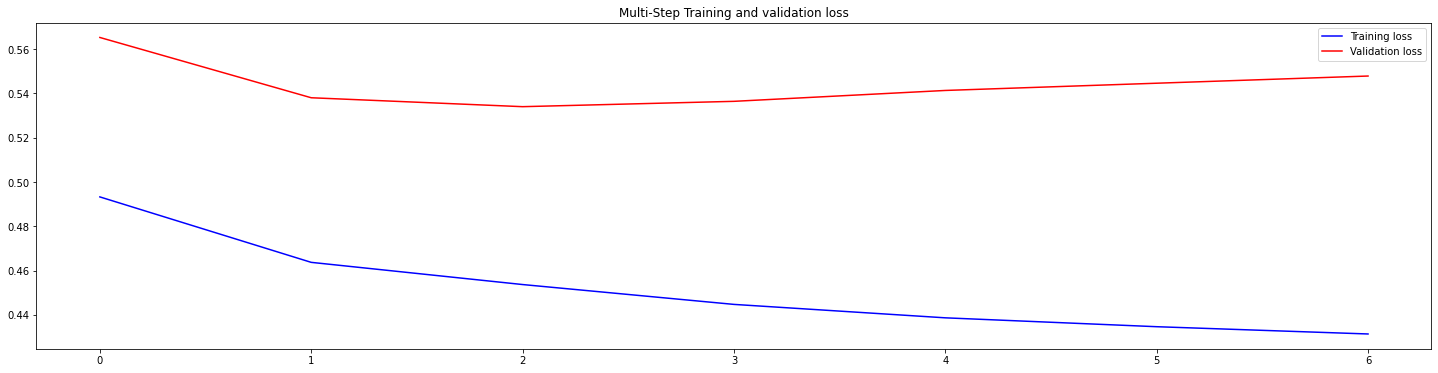

In [ ]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

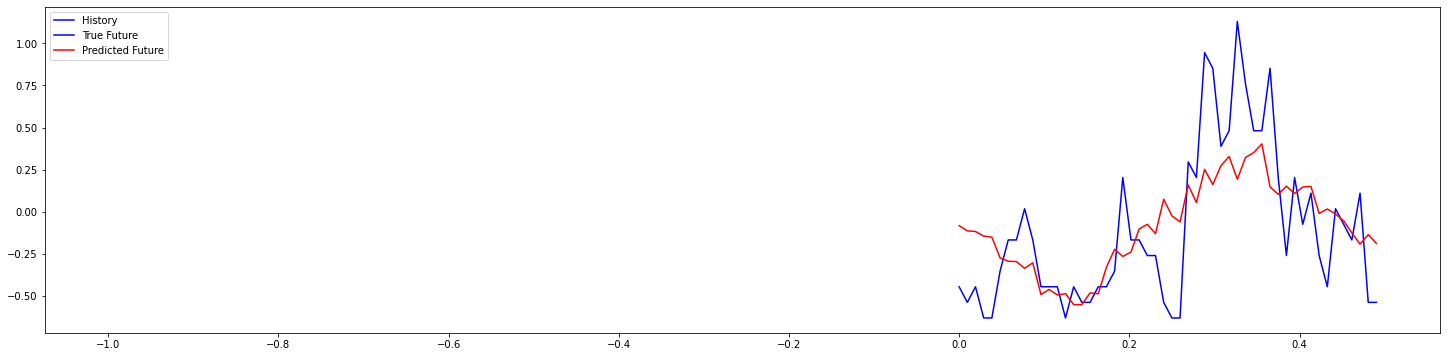

In [ ]:
for x, y in val_data_multi.take(1):
  multi_step_plot(x[-1], y[-1], multi_step_model.predict(x)[-1])

In [ ]:
iq_pred_ = inv_standardize(multi_step_model.predict(x)[-1], data_mean[target_col], data_std[target_col]).astype('int64')

In [ ]:
iq_predictions = pd.DataFrame(iq_pred_, index=features.index[-52:], columns=['TensorFlow_Predictions'])
iq_predictions.head()

TensorFlow_Predictions
week_start_date                        
2009-07-02                            5
2009-07-09                            5
2009-07-16                            5
2009-07-23                            5
2009-07-30                            5

In [ ]:
iq_predictions.to_csv('iq_predictions.csv')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(iq_train_labels[-52:].values, iq_pred_)
accuracy_score(iq_train_labels[-52:].values, iq_pred_, normalize=False)

4

In [ ]:
from sklearn.metrics import mean_squared_error as mse
iq_mse = mse(iq_train_labels[-52:].values, iq_pred_)
print(iq_mse)

13.057692307692308


In [ ]:
iq_mae = mae(iq_train_labels[-52:].values, iq_pred_)
print(iq_mae)

2.7884615384615383


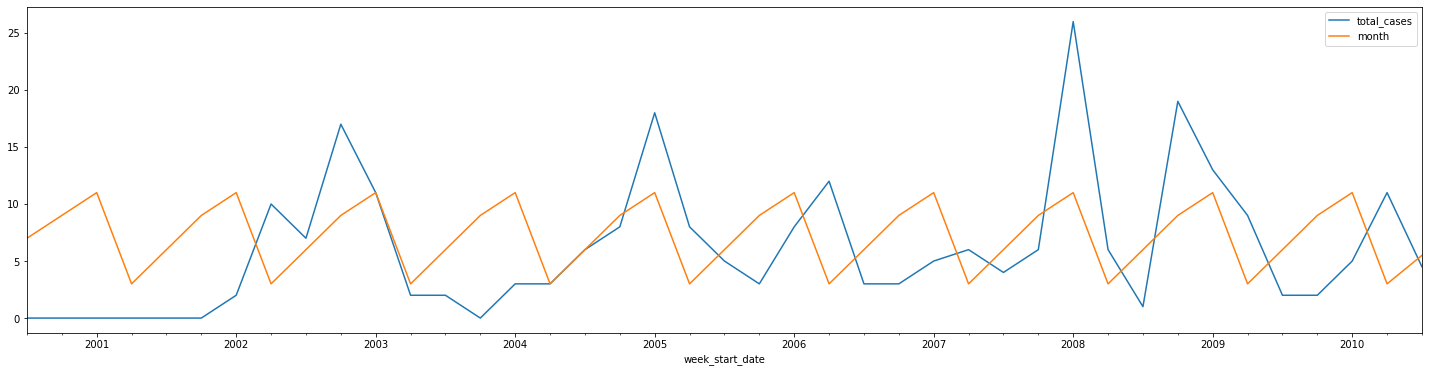

In [ ]:
features[['total_cases','month']].resample("3m").median().plot(figsize=(25,6));

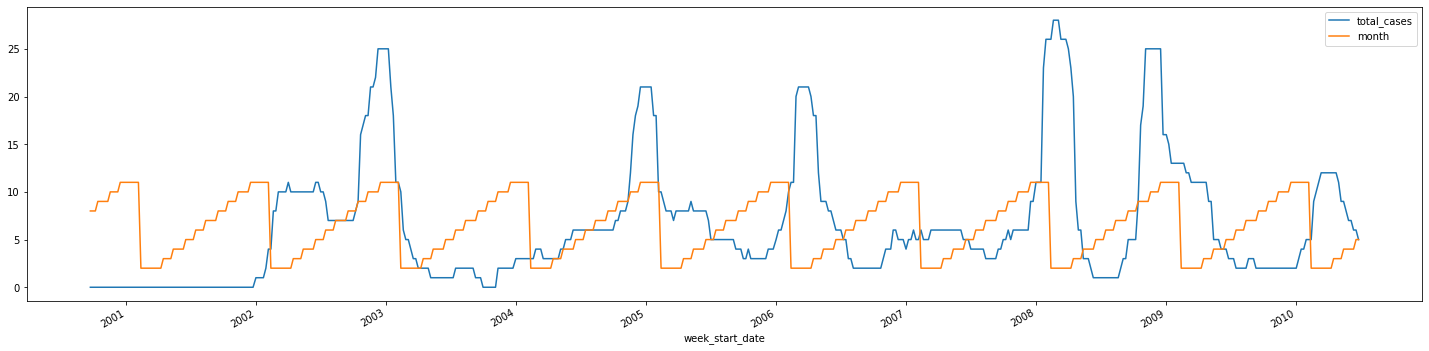

In [ ]:
features[['total_cases','month']].rolling(13).median().plot(figsize=(25,6));

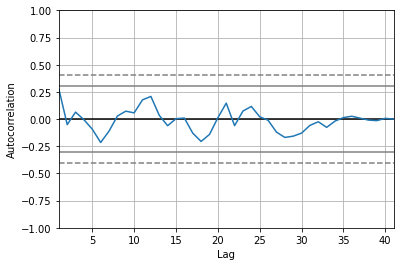

In [ ]:
pd.plotting.autocorrelation_plot(features[['total_cases']].resample("3m").median());